In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
customers=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_customers_dataset.csv')
location=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_geolocation_dataset.csv')
order_items=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_order_items_dataset.csv')
order_payments=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_order_payments_dataset.csv')
order_reviews=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_order_reviews_dataset.csv')
orders=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_orders_dataset.csv')
products=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_products_dataset.csv')
sellers=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/olist_sellers_dataset.csv')
translation=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/product_category_name_translation.csv')

In [ ]:
# 제품 이름 번역
products_trans=products.merge(translation,on='product_category_name',how='left')
products_trans.drop(columns='product_category_name',inplace=True)
products_trans.insert(1,'product_category_name',products_trans['product_category_name_english'])
products_trans.drop(columns='product_category_name_english',inplace=True)
products_trans.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## 판매자 관점 지표 분석

###1. Acqusition & Retention

In [ ]:
order_items['seller_id'].nunique()
# 3095명의 고유 판매자

3095

In [ ]:

## 날짜 변환
order_items_merged_R= order_items.merge(orders, on='order_id', how='left')
order_items_merged_R
date_columns=['order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date','order_delivered_carrier_date'
,'shipping_limit_date','order_approved_at']
for col in date_columns:
  order_items_merged_R[col]=pd.to_datetime(order_items_merged_R[col])

## order_status가 canceled + unavialable 제거
order_items_merged_R=order_items_merged_R[order_items_merged_R['order_status']!='canceled']
order_items_merged_R=order_items_merged_R[order_items_merged_R['order_status']!='unavailable']
order_items_merged_R['order_sell_date']= order_items_merged_R['order_purchase_timestamp'].dt.date


In [ ]:
order_items_merged_R.order_id.nunique()

98199

In [ ]:
order_items_merged_R['order_id'].nunique()

98199

In [ ]:
order_items_merged_R['seller_id'].nunique()

3053

In [ ]:
order_items_merged_R.describe().T

,count,mean,min,25%,50%,75%,max,std
order_item_id,112101.0,1.197349,1.0,1.0,1.0,1.0,21.0,0.704307
shipping_limit_date,112101,2018-01-07 19:28:06.622447872,2016-09-19 23:11:33,2017-09-20 23:24:26,2018-01-26 13:59:24,2018-05-10 14:53:13,2020-04-09 22:35:08,NaN
price,112101.0,120.377166,0.85,39.9,74.9,134.9,6735.0,182.637401
freight_value,112101.0,19.992028,0.0,13.08,16.27,21.15,409.68,15.797782
order_purchase_timestamp,112101,2018-01-01 04:20:37.930892544,2016-09-04 21:15:19,2017-09-13 23:13:16,2018-01-19 22:20:50,2018-05-04 17:51:51,2018-09-03 09:06:57,NaN
order_approved_at,112086,2018-01-01 15:56:38.286271488,2016-09-15 12:16:38,2017-09-14 11:50:23,2018-01-20 12:51:33.500000,2018-05-05 03:15:10.500000,2018-09-03 17:40:06,NaN
order_delivered_carrier_date,111380,2018-01-05 02:26:07.599587328,2016-10-08 10:34:01,2017-09-18 20:19:28.249999872,2018-01-24 18:09:24,2018-05-08 13:38:15,2018-09-11 19:48:28,NaN
order_delivered_customer_date,110189,2018-01-14 13:59:34.689261056,2016-10-11 13:46:32,2017-09-26 20:15:35,2018-02-02 21:05:09,2018-05-15 20:14:33,2018-10-17 13:22:46,NaN
order_estimated_delivery_date,112101,2018-01-25 00:31:16.736157696,2016-10-04 00:00:00,2017-10-05 00:00:00,2018-02-16 00:00:00,2018-05-28 00:00:00,2018-10-25 00:00:00,NaN


In [ ]:
first_recent_time = order_items_merged_R.groupby('seller_id').agg(
    last_order_date=('order_purchase_timestamp', 'max'),
    first_order_date=('order_purchase_timestamp', 'min')
)
first_recent_time.head()

,last_order_date,first_order_date
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,2017-10-18 08:16:34,2017-09-26 22:17:05
001cca7ae9ae17fb1caed9dfb1094831,2018-07-12 21:38:26,2017-02-04 19:06:04
002100f778ceb8431b7a1020ff7ab48f,2018-04-12 12:58:23,2017-09-14 01:00:31
003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25,2017-12-15 06:52:25
004c9cd9d87a3c30c522c48c4fc07416,2018-05-03 11:13:38,2017-01-27 10:34:34


In [ ]:
#  1. 판매자 유입 및 유지 분석
first_recent_time = order_items_merged_R.groupby('seller_id').agg(
    last_order_date=('order_purchase_timestamp', 'max'),
    first_order_date=('order_purchase_timestamp', 'min')
).reset_index()

first_recent_time['last_order_date'] = pd.to_datetime(first_recent_time['last_order_date'])
first_recent_time['last_order_date_month'] = first_recent_time['last_order_date'].dt.to_period('M')
first_recent_time['first_order_date_month']= pd.to_datetime(first_recent_time['first_order_date'])
first_recent_time['first_order_date_month'] = first_recent_time['first_order_date'].dt.to_period('M')

first_sell_month = first_recent_time.groupby('first_order_date_month')['seller_id'].count()
recent_sell_month = first_recent_time.groupby('last_order_date_month')['seller_id'].count()
seller_month=pd.DataFrame({'first_sell_month':first_sell_month,'recent_sell_month':recent_sell_month})
seller_month.fillna(0,inplace=True)
seller_month['first_sell_month']=seller_month['first_sell_month'].astype(int)
seller_month['recent_sell_month']=seller_month['recent_sell_month'].astype(int)
seller_month.head()


,first_sell_month,recent_sell_month
2016-09,2,0
2016-10,131,24
2016-12,1,0
2017-01,153,19
2017-02,230,63


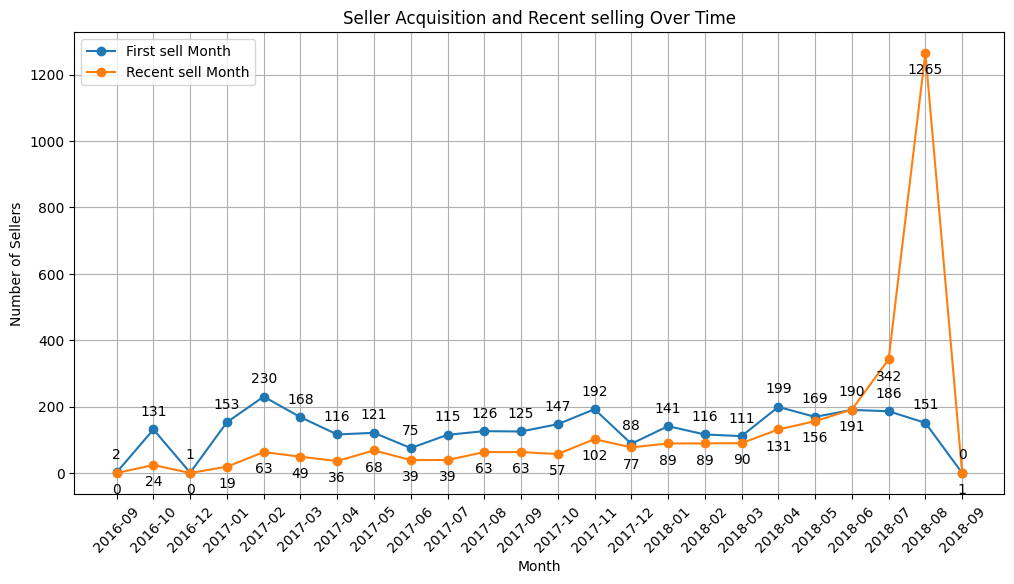

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(seller_month.index.astype(str), seller_month['first_sell_month'], marker='o', label='First sell Month')
plt.plot(seller_month.index.astype(str), seller_month['recent_sell_month'], marker='o', label='Recent sell Month')

# Adding numbers on the plot
for i, txt in enumerate(seller_month['first_sell_month']):
    plt.annotate(txt, (seller_month.index.astype(str)[i], seller_month['first_sell_month'][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(seller_month['recent_sell_month']):
    plt.annotate(txt, (seller_month.index.astype(str)[i], seller_month['recent_sell_month'][i]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.xlabel('Month')
plt.ylabel('Number of Sellers')
plt.title('Seller Acquisition and Recent selling Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


# 총 3095명의 판매자 중 1265명의 판매자가 가장 최근까지 판매를 진행
# 첫 판매가 많았던 월은 17년 2월(232명), 17년 11월(192명), 18년 4월(199명)
# 2016년은 대체로 유입이 저조하다.
# 2018년 8월까지 계속 판매를 한 인원은 1265명으로 전체 고유 판매자 중 40%를 차지
# 8월까지 계속 판매한 인원들의 유입 분석
# 1. 판매자별 계약 기간 확인하기
# 2. 1265명의 판매자가 얼마나 판매를 지속했는지 확인 필요


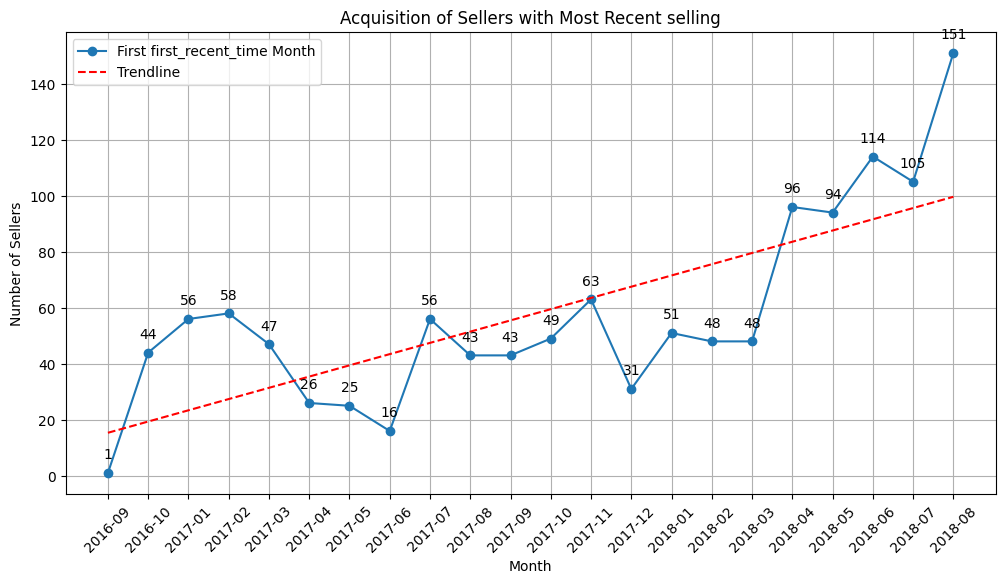

In [ ]:
# 8월까지 최근 판매를 한 사람이 40%나 되니, 2018년 8월까지(가장 최근) 판매한 판매자들의 유입은 증가했을 것이다.

recent_sellers = first_recent_time[first_recent_time['last_order_date_month'] == '2018-08']
recent_sellers = recent_sellers.groupby('first_order_date_month')['seller_id'].count()

plt.figure(figsize=(12, 6))
plt.plot(recent_sellers.index.astype(str), recent_sellers.values, marker='o', label='First first_recent_time Month')

for i, txt in enumerate(recent_sellers.values):
    plt.annotate(txt, (recent_sellers.index.astype(str)[i], recent_sellers.values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 추세선 계산
x_values = np.arange(len(recent_sellers))
z = np.polyfit(x_values, recent_sellers.values, 1)  # 1차 다항식(직선)으로 추세선 계산
p = np.poly1d(z)

plt.plot(recent_sellers.index.astype(str), p(x_values), "r--", label='Trendline')


plt.xlabel('Month')
plt.ylabel('Number of Sellers')
plt.title('Acquisition of Sellers with Most Recent selling')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# 2016년 9월부터 2018년 8월까지, 판매자 유입이 전반적으로 증가
# 2018년에 들어서면서 유입이 급격히 증가한 것이 확인됨
# 2018년 4월 이후, 판매자 유입이 급격히 증가 -> 증가 추세는 기업의 마케팅 전략 강화, 플랫폼 성장 가능성


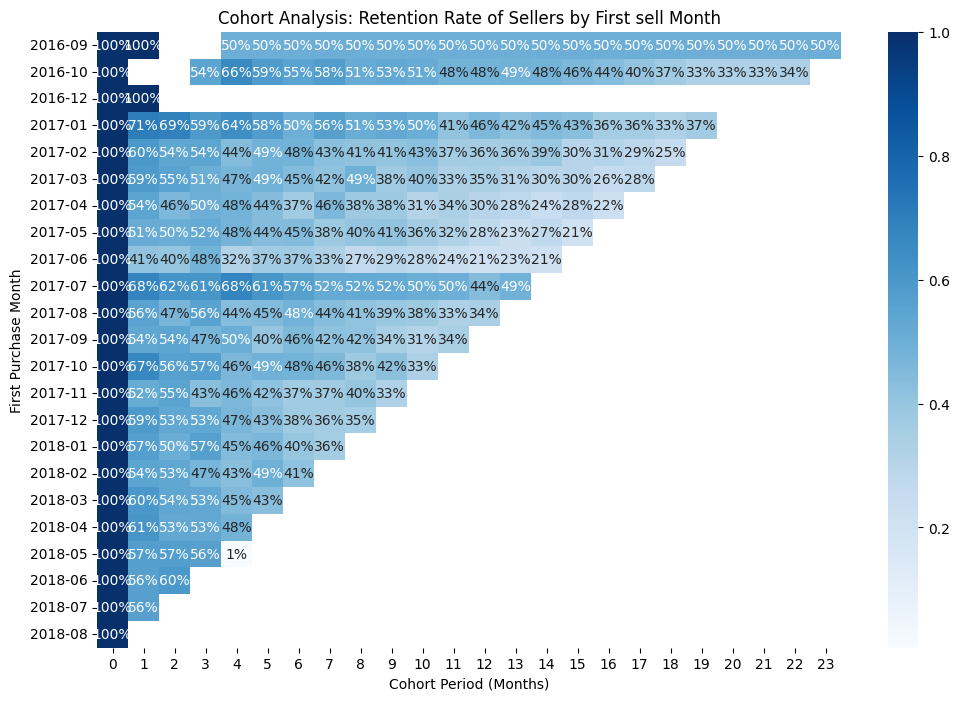

In [ ]:
## 코호트
## 리텐션 주기를 월로 설정한 근거: 솔루션의 계약단위는 월 단위
order_items_merged_R['first_sell_month'] = order_items_merged_R.groupby('seller_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
order_items_merged_R['sell_month'] = order_items_merged_R['order_purchase_timestamp'].dt.to_period('M')
cohort_data = order_items_merged_R.groupby(['first_sell_month', 'sell_month']).agg({'seller_id': pd.Series.nunique}).reset_index()


# CohortPeriod 계산
cohort_data['cohort_period'] = (cohort_data['sell_month'] - cohort_data['first_sell_month']).apply(lambda x: x.n)

# 피벗 테이블 생성
cohort_pivot = cohort_data.pivot_table(index='first_sell_month', columns='cohort_period', values='seller_id')

# 첫 달 판매자 수로 나누어 리텐션율 계산
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt=".0%", cmap="Blues")
plt.title('Cohort Analysis: Retention Rate of Sellers by First sell Month')
plt.xlabel('Cohort Period (Months)')
plt.ylabel('First Purchase Month')
plt.show()

# 리텐션은 대체적으로 지수함수 형태를 가진다.
# 당연히 점진적으로 감소하지만, 첫 유입 판매자가 최근까지의 유지율은 21% 이상이다. -> 매우 준수함
# 대부분의 코호트에서 첫 달 이후 3달까지 50% 이상의 판매자가 활동을 유지한다. ->  플랫폼에 처음 유입된 판매자들이 초기에는 비교적 높은 비율로 활동을 지속
# 2018년 5월 유입의 3개월 후 코호트 1%로 급락(무시 가) -> 확인한 결과 9월 주문은 전체 총 1건이고, 5월 첫 유입 중 한명이 9월에 한 건 주문을 처리했기 때문
# 2017년 2월 ~ 2017년 6월까지의 유입 판매자는 2018년 8월까지 유지율이 20% 대 정도로 상대적으로 이탈이 높다.
# 2017년 7월 유입의 현재까지 유지율은 무려 49%로, 절반 가까이 유지율. 해당 월이 마케팅 액션이 있는지 확인(공교롭게도, 퍼널 데이터는 17 6월 이후라, 아귀가 맞을지도)

# olist_store의 판매자 유지율은 상당히 높다. 즉 약점에 대한 개선 보다 강점에 대한 강화가 더 필요할 수 있다.

# 임의 집단1: 첫 판매 개시 이후 3개월 유지 집단 vs 이외
# 2: 2017년 2월 ~ 2017년 6월까지의 유입 판매자
# 3: 2017년 7월 판매 개시 판매자

In [ ]:
## 이탈 분석
seller_activity = order_items_merged_R.groupby(['seller_id', 'sell_month']).size().unstack(fill_value=0)
seller_activity.head()

sell_month,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
seller_id,,,,,,,,,,,,,,,,,,,,,,,,
0015a82c2db000af6aaaf3ae2ecb0532,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0
001cca7ae9ae17fb1caed9dfb1094831,0,0,0,0,11,17,16,27,23,25,12,16,25,25,13,8,3,10,5,0,2,1,0,0
002100f778ceb8431b7a1020ff7ab48f,0,0,0,0,0,0,0,0,0,0,0,4,11,12,16,3,4,3,2,0,0,0,0,0
003554e2dce176b5555353e4f3555ac8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
004c9cd9d87a3c30c522c48c4fc07416,0,0,0,6,15,9,11,5,10,13,22,15,6,18,13,8,3,8,6,2,0,0,0,0


In [ ]:
# 계약 첫 개월 후 이탈한 판매자

# 각 판매자의 행에서 0이 아닌 값의 개수를 계산
non_zero_counts = (seller_activity > 0).sum(axis=1)

# 값이 1개인 판매자 필터링
sellers_with_1_non_zero = non_zero_counts[non_zero_counts == 1]

print(f"판매 월이 한 달뿐인 판매자 수: {sellers_with_1_non_zero.count()}")

churn_after_one_month_seller=sellers_with_1_non_zero.index.tolist()
churn_after_one_month_seller=order_items_merged_R[order_items_merged_R['seller_id'].isin(churn_after_one_month_seller)]

# sell_month가 2018-08인 경우는 제외
churn=churn_after_one_month_seller[churn_after_one_month_seller['sell_month'] != '2018-08']['seller_id'].nunique()
print(f"2018년 8월을 제외한 판매 월이 한 달뿐인 판매자 수: {churn}")


판매 월이 한 달뿐인 판매자 수: 736
2018년 8월을 제외한 판매 월이 한 달뿐인 판매자 수: 585


In [ ]:
# 총 기간 중 일정 기간(월) 동안 물건을 판매한 판매자의 수

monthly_count = non_zero_counts[non_zero_counts > 0]
monthly_count = np.bincount(monthly_count)
indices = np.nonzero(monthly_count)[0]
values = monthly_count[indices]

cumulative_values = np.cumsum(values)
total_sellers = cumulative_values[-1]
cumulative_percentages = (cumulative_values / total_sellers) * 100

print(monthly_count, '\n\n',cumulative_percentages)

[  0 736 485 328 257 220 144 125  97  76  85  77  62  59  67  32  44  39
  41  36  28  14   1] 

 [ 24.10743531  39.99344907  50.73698002  59.15492958  66.36095644
  71.07762856  75.171962    78.34916476  80.83851949  83.62266623
  86.14477563  88.17556502  90.1080904   92.30265313  93.35080249
  94.79200786  96.0694399   97.41238126  98.5915493   99.50867999
  99.96724533 100.        ]


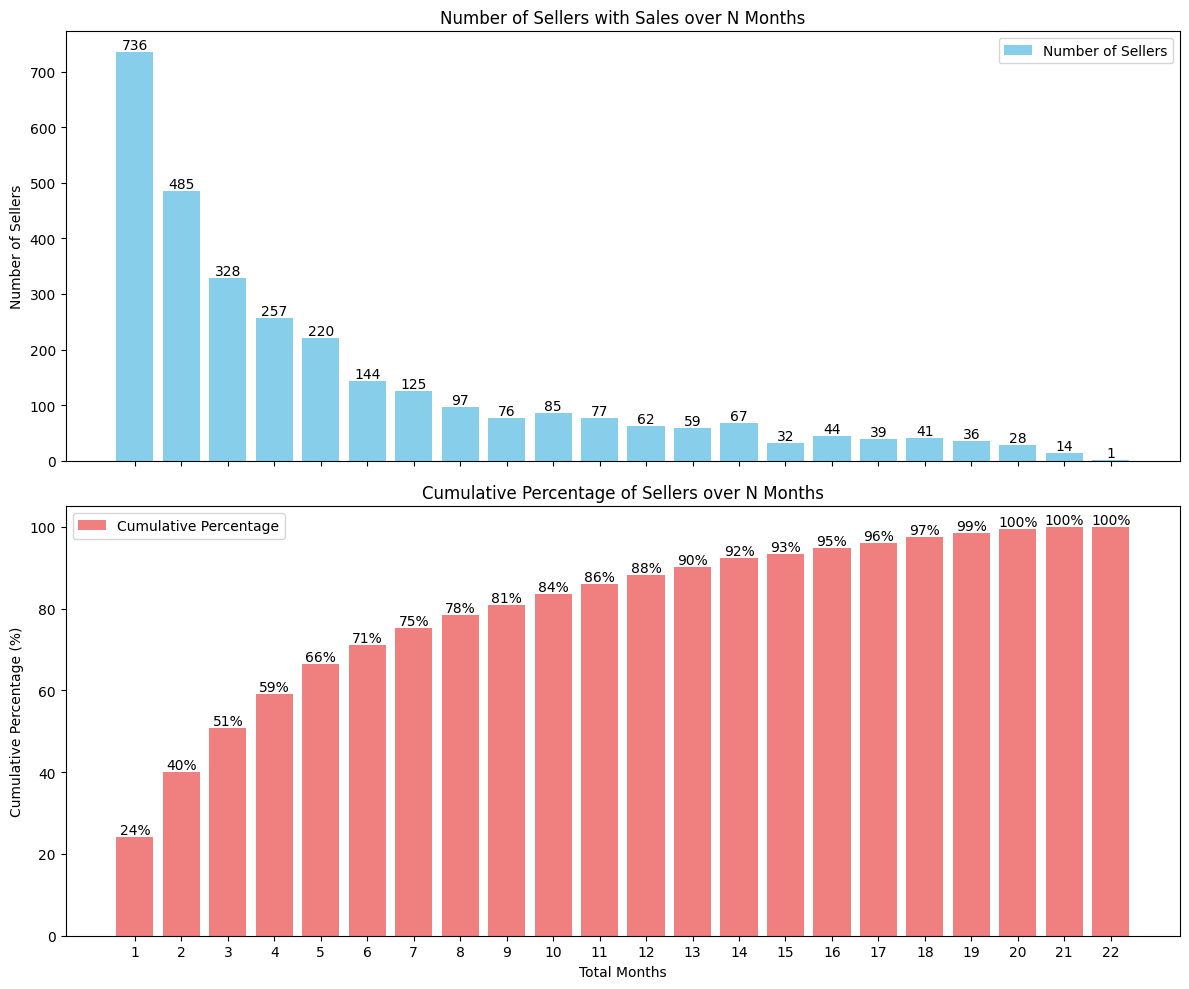

In [ ]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# 계약 유지월별 판매자 수
bars = ax1.bar(indices, values, color='skyblue', label='Number of Sellers')
ax1.set_ylabel('Number of Sellers')
ax1.set_title('Number of Sellers with Sales over N Months')

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

ax1.legend()

# 누적 비율 시각화
cumulative_bars = ax2.bar(indices, cumulative_percentages, color='lightcoral', label='Cumulative Percentage')
ax2.set_xlabel('Total Months')
ax2.set_ylabel('Cumulative Percentage (%)')
ax2.set_title('Cumulative Percentage of Sellers over N Months')

for bar in cumulative_bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%', ha='center', va='bottom')

ax2.set_xticks(indices)
ax2.legend()

plt.tight_layout()
plt.show()

# 1개월 동안 계약을 한 판매자가 736명으로, 가장 많다. 단기 계약 판매자가 많으며, 이는 첫 계약 이후 지속적으로 계약을 이어가지 않은 것(1개월 체험 or 단순 계약 연장 x)
# 3개월에서 6개월 동안 계약을 유지한 판매자들이 상당수 존재.
# 12개월 이상 계약을 유지한 판매자 수는 점차 감소한다.
# 많은 판매자가 단기적으로 계약을 하고, 장기적으로는 활동을 줄이거나 중단하는 경향을 보인다.
# 판매자의 장기 계약을 노리는 전략 제시가 필요해보인다.

# 임의 후보 집단
# 1개월 계약자가 전체 판매자 중 24%를 차지 (활동이 매우 적은, 이탈에 가까운)
# 2-3개월 간헐적 활동 ~50%
# 4-9개월 중간 활동 ~80%
# 10개월~ 22개월 (가장활발한 판매자) ~ 100%


In [ ]:
monthly_count

array([  0, 736, 485, 328, 257, 220, 144, 125,  97,  76,  85,  77,  62,
        59,  67,  32,  44,  39,  41,  36,  28,  14,   1])

### Activation

#### 1.1 Recency

In [ ]:
# 2번째로 큰 날 구하기
order_items_merged_R['order_purchase_timestamp'].nlargest(10)
# 9월 주문 건수 단 1건이다.
# 가장 최근까지의 구매날짜를 2018년 8월 29일로 조정하는 것이 합리적이다.

,order_purchase_timestamp
37073,2018-09-03 09:06:57
23530,2018-08-29 15:00:37
1722,2018-08-29 14:52:00
9829,2018-08-29 14:18:28
4924,2018-08-29 14:18:23
4925,2018-08-29 14:18:23
36164,2018-08-29 12:25:59
91787,2018-08-29 11:06:11
94807,2018-08-29 10:22:35
63590,2018-08-29 09:48:09


In [ ]:
order_items_merged_R.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112101 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112101 non-null  object        
 1   order_item_id                  112101 non-null  int64         
 2   product_id                     112101 non-null  object        
 3   seller_id                      112101 non-null  object        
 4   shipping_limit_date            112101 non-null  datetime64[ns]
 5   price                          112101 non-null  float64       
 6   freight_value                  112101 non-null  float64       
 7   customer_id                    112101 non-null  object        
 8   order_status                   112101 non-null  object        
 9   order_purchase_timestamp       112101 non-null  datetime64[ns]
 10  order_approved_at              112086 non-null  datetime64[ns]
 11  order

In [ ]:
# 판매자 Recency 구하기,
Recency = order_items_merged_R.groupby('seller_id').agg({
    'order_purchase_timestamp': ['min', 'max']
}).reset_index()
Recency.columns = ['seller_id', 'first_order_date', 'last_order_date']
Recency['recency'] = (order_items_merged_R['order_purchase_timestamp'].nlargest(2).iloc[1] - Recency['last_order_date']).dt.days
# Recency['months_with_sale'] = pnon_zero_counts.reset_index()
Recency=pd.merge(Recency,non_zero_counts.reset_index(),on='seller_id',how='left')
Recency.rename(columns={0:'months_with_sale'},inplace=True)
Recency.head()

# months_with_sale라고 명명한 이유, 6개월 동안 판매가 있었던 판매자의 경우 1,3,4,5,6,7D월 판매, 2월은 판매 안된 경우 있기 때문
# contract_months는 연속적인 계약인 느낌이라.


,seller_id,first_order_date,last_order_date,recency,months_with_sale
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09-26 22:17:05,2017-10-18 08:16:34,315,2
1,001cca7ae9ae17fb1caed9dfb1094831,2017-02-04 19:06:04,2018-07-12 21:38:26,47,17
2,002100f778ceb8431b7a1020ff7ab48f,2017-09-14 01:00:31,2018-04-12 12:58:23,139,8
3,003554e2dce176b5555353e4f3555ac8,2017-12-15 06:52:25,2017-12-15 06:52:25,257,1
4,004c9cd9d87a3c30c522c48c4fc07416,2017-01-27 10:34:34,2018-05-03 11:13:38,118,17


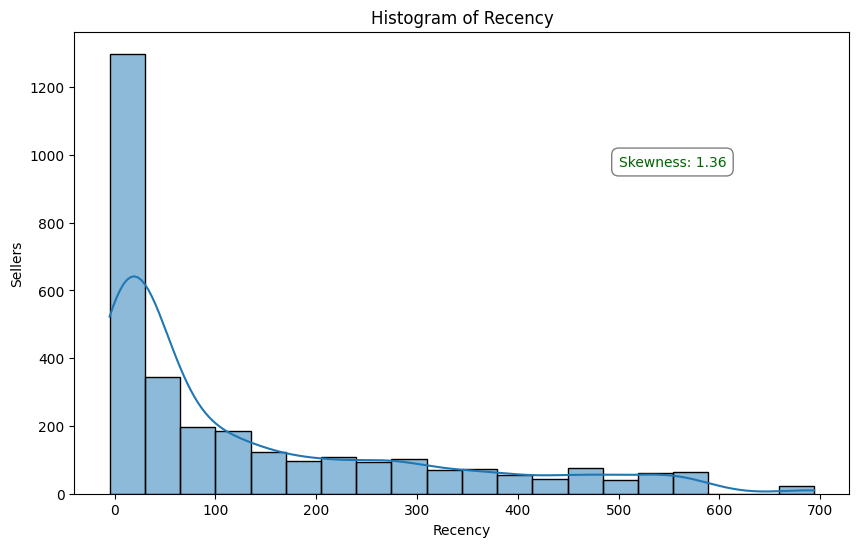

In [ ]:

from scipy.stats import skew
# Recency histogram + skew
plt.figure(figsize=(10, 6))
sns.histplot(Recency['recency'], kde=True, bins=20)
plt.xlabel('Recency')
plt.ylabel('Sellers')
plt.title('Histogram of Recency')
plt.text(500, 1000, f'Skewness: {skew(Recency["recency"]):.2f}', fontsize=10, color='darkgreen', ha='left', va='top',
         bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))
plt.show()

# 약 한 달이내 판매가 이루어졌던 판매자들의 비율은 약 41퍼, 3달이내로 확장하면 60퍼까지 이른다.(Recency =< 100)
# 분포의 경우 오른쪽으로 약간 롱테일인데, 향후 표준화할지에 대해 고려 필요 (skewness: 1.36)

In [ ]:
# Recency가 높은 고객은 이탈한 가능성이 높은 고객인가? Recency vs 판매 활성화 개월 수

R_corr=Recency[['recency','months_with_sale']].corr().round(2)
R_corr

,recency,months_with_sale
recency,1.00,-0.37
months_with_sale,-0.37,1.00


상관계수: -0.37
p-value: 7.701650325327779e-98


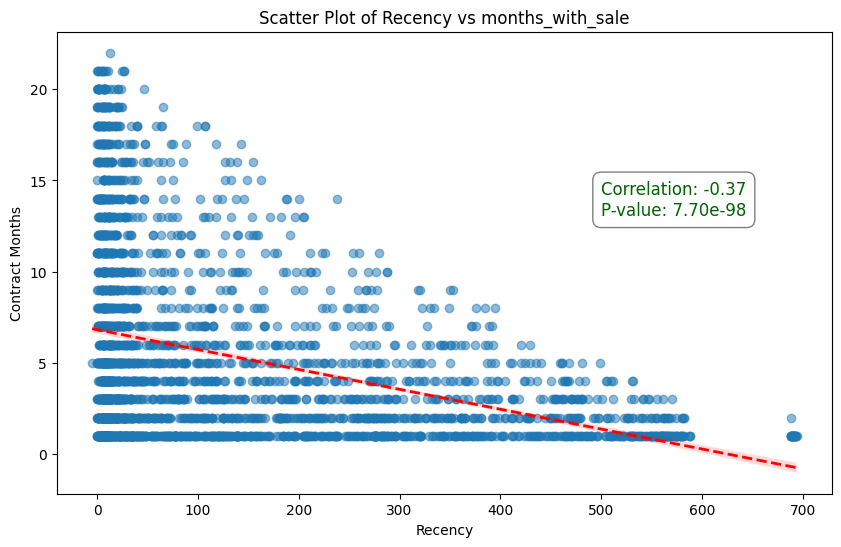

In [ ]:
# 상관계수 유의성 검증
import scipy.stats as stats
corr, p_value = stats.pearsonr(Recency['recency'], Recency['months_with_sale'])
print("상관계수:", corr.round(2))
print("p-value:", p_value)
plt.figure(figsize=(10, 6))
sns.regplot(x='recency', y='months_with_sale', data=Recency, scatter_kws={'alpha': 0.5},line_kws={'color': 'red', 'lw': 2, 'ls': '--'})
plt.xlabel('Recency')
plt.ylabel('Contract Months')
plt.title('Scatter Plot of Recency vs months_with_sale')
plt.text(500, 15, f'Correlation: {corr:.2f}\nP-value: {p_value:.2e}',
         fontsize=12, color='darkgreen', ha='left', va='top',
         bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))
plt.show()

# p-value는 유의미함
# 판매 활성화 개월 수가 길수록, Recency는 작아지는 형태(최근까지 구매를 한)를 보임 -> 약한 음의 상관관계(-.0.37)
# 주의할 점: 허위상관에 빠져선 안된다 -> 계약 기간은 2017년 한해로 12개월로 많지만, 18년은 계약이 없을 수 있다.

,recency
count,423.00
mean,30.07
std,43.79
min,0.00
15%,4.00
30%,7.00
45%,11.00
50%,12.00
60%,17.00
75%,30.00


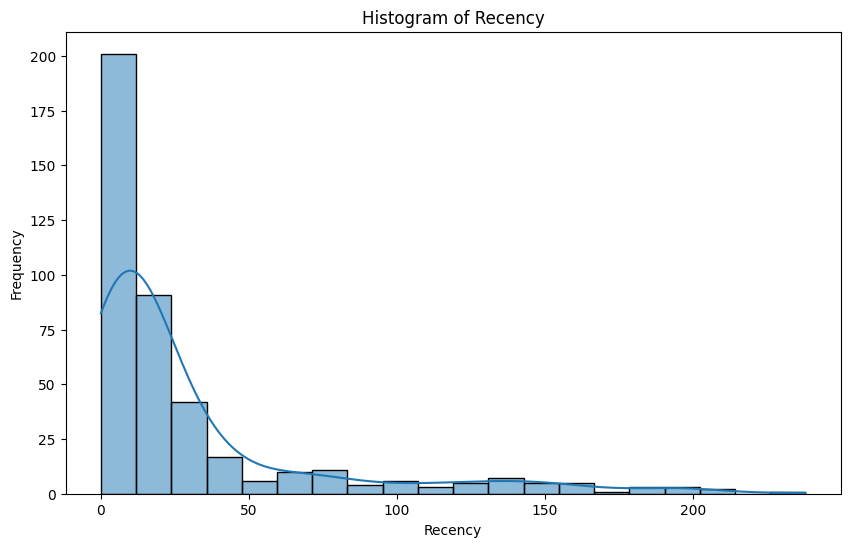

In [ ]:
# 판매활성화 수가 길면 최근까지 구매가 이어졌을까?
# 판매 활성화 월수가 12개월 이상인 이들의 Recency 분포는?
display(Recency[Recency['months_with_sale']>=12]['recency'].describe(percentiles=[0.15,0.3,0.45,0.6,0.75,0.9]).round(2))
plt.figure(figsize=(10, 6))
sns.histplot(Recency[Recency['months_with_sale']>=12]['recency'], kde=True, bins=20)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Histogram of Recency')
plt.show()

# 12개월 동안 판매한 판매자들의 60%는 Rencency 24일 이내 최근 구매가 이어졌다.
# 90% 구간 부터 약 4개월(Recency 91)전에 판매를 지속하지 않았다.
#  이 시점 이후로 판매 활동이 중단된 10% 남짓의 판매자들을 다시 활성화할 필요 있다.
# 최대 10개월(Rencency 306일) 정도 이전에 판매를 종료한 판매자도 있다.

# 활동성이 높은 판매자들을 유지하기 위한 전략뿐만 아니라, 활동성이 떨어진 판매자들에게도 새로운 참여 기회를 제공 필요
# 임의 집단: 90% vs 10%

#### 1.2 Frequency


In [ ]:
# Frequncy 설정에 대한 고찰:
order_items_merged_R[order_items_merged_R['order_id']=='8272b63d03f5f79c56e9e4120aec44ef'].head()
# 한 주문에는 여러 품목이 포함되어 있을 수 있다. 즉 10개 제품을 사도 개별 10개 order_id가 아닌, 1개의 주문이다.
# count가 아닌 nunique가 합당하다고 판단됨

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_sell_date,first_sell_month,sell_month
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,2017-07-16,2017-02,2017-07
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,2017-07-16,2017-02,2017-07
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,2017-07-16,2017-02,2017-07
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,2017-07-16,2017-02,2017-07
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,2017-07-16,2017-02,2017-07


In [ ]:
order_items_merged_R.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112101 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112101 non-null  object        
 1   order_item_id                  112101 non-null  int64         
 2   product_id                     112101 non-null  object        
 3   seller_id                      112101 non-null  object        
 4   shipping_limit_date            112101 non-null  datetime64[ns]
 5   price                          112101 non-null  float64       
 6   freight_value                  112101 non-null  float64       
 7   customer_id                    112101 non-null  object        
 8   order_status                   112101 non-null  object        
 9   order_purchase_timestamp       112101 non-null  datetime64[ns]
 10  order_approved_at              112086 non-null  datetime64[ns]
 11  order

In [ ]:
Frequency=order_items_merged_R.groupby('seller_id').agg({'order_id':'nunique'}).reset_index()
Frequency.columns=['seller_id','frequency']
Frequency['monthly average sales']=np.round(Frequency['frequency']/Recency['months_with_sale']) # 월 평균 판매수
display(Frequency.sort_values('frequency',ascending=False).head(50))
print(' ')
print('총 판매된 주문 건수(frequency의 합): ',Frequency['frequency'].sum() )

,seller_id,frequency,monthly average sales
1219,6560211a19b47992c3666cc44a7e94c0,1847,97.0
873,4a3ca9315b744ce9f8e9374361493884,1804,90.0
2451,cc419e0650a3c5ba77189a1882b7556a,1697,85.0
366,1f50f920176fa81dab994f9023523100,1403,83.0
2611,da8622b14eb17ae2831f4ac5b9dab84a,1314,69.0
1799,955fee9216a65b617aa5c0531780ce60,1286,92.0
1485,7a67c85e85bb2ce8582c35f2203ad736,1159,58.0
2800,ea8482cd71df3c1969d7b9473ff13abc,1145,88.0
849,4869f7a5dfa277a7dca6462dcf3b52b2,1131,67.0
724,3d871de0142ce09b7081e2b9d1733cb1,1076,60.0


 
총 판매된 주문 건수(frequency의 합):  99542


In [ ]:
display(Frequency['frequency'].describe(percentiles=[0.15,0.3,0.45,0.6,0.75,0.9]).round(2))

,frequency
count,3053.00
mean,32.60
std,105.57
min,1.00
15%,1.00
30%,3.00
45%,5.00
50%,7.00
60%,10.00
75%,22.00


In [ ]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


,frequency
count,3053.00
mean,32.60
std,105.57
min,1.00
15%,1.00
30%,3.00
45%,5.00
50%,7.00
60%,10.00
75%,22.00


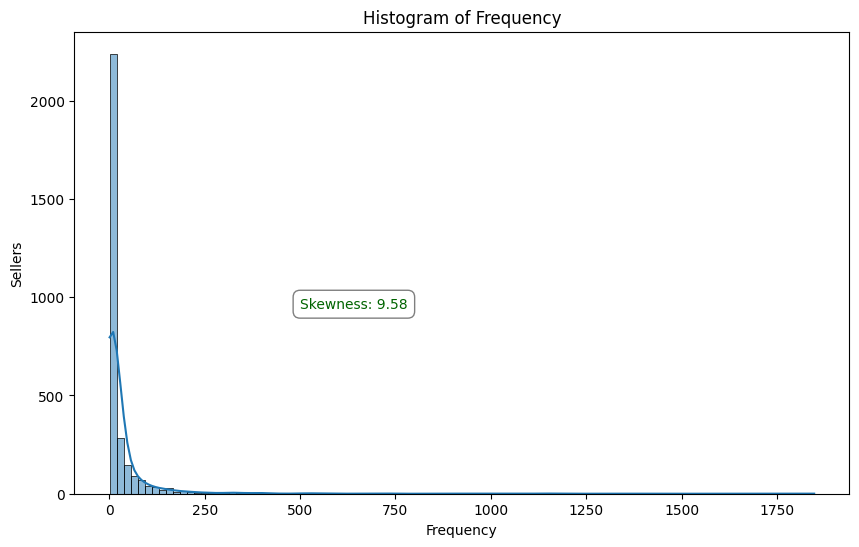

In [ ]:
display(Frequency['frequency'].describe(percentiles=[0.15,0.3,0.45,0.6,0.75,0.9,0.95]).round(2).T)

# Frequency histogram + skew
plt.figure(figsize=(10, 6))
sns.histplot(Frequency["frequency"], kde=True, bins=100)
plt.xlabel('Frequency')
plt.ylabel('Sellers')
plt.title('Histogram of Frequency')
plt.text(500, 1000, f'Skewness: {skew(Frequency["frequency"]):.2f}', fontsize=10, color='darkgreen', ha='left', va='top',
         bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))
plt.show()

# 판매건수의 60% 구간에서 10개 이하로 판매된 것이 나타난다.
# 95% 구간에서도 131개 정도로 판매가 이루어졌다.
# max가 1847개 판매로 보아, 고래 판매자가 상위 n% 구간에 존재하는지 파악해야한다.

In [ ]:
# frequency가 1000개 이상인 seller의 비율
seller_1000=Frequency[Frequency['frequency']>=1000].shape[0]/Frequency.shape[0]
print('frequency가 1000개 이상인 seller의 비율: 상위',round(seller_1000,3)*100,'%')
# frequency가 1000개 이상인 인원 수
print('frequency가 1000개 이상인 seller의 수: ',Frequency[Frequency['frequency']>=1000].shape[0])


# frequency가 131개 이상인 seller의 비율(5%)과 인원 수
seller_131=Frequency[Frequency['frequency']>=131].shape[0]/Frequency.shape[0]
print('frequency가 131개 이상인 seller의 비율: 상위',round(seller_131,3)*100,'%')
# frequency가 131개 이상인 인원 수
print('frequency가 131개 이상인 seller의 수: ',Frequency[Frequency['frequency']>=131].shape[0])

# frequency 70개 이상의 seller의 비율
seller_70=Frequency[Frequency['frequency']>=70].shape[0]/Frequency.shape[0]
print('frequency가 70개 이상인 seller의 비율: 상위',round(seller_70,1)*100,'%')

# frequency가 30개 이하인 인원 수
print('frequency가 30개 이하인 seller의 수: ',Frequency[Frequency['frequency']<=30].shape[0])
# 비율
seller_30=Frequency[Frequency['frequency']<=30].shape[0]/Frequency.shape[0]
print('frequency가 30개 이하인 seller의 비율: 하위',round(seller_30,1)*100,'%')

frequency가 1000개 이상인 seller의 비율: 상위 0.3 %
frequency가 1000개 이상인 seller의 수:  10
frequency가 131개 이상인 seller의 비율: 상위 5.0 %
frequency가 131개 이상인 seller의 수:  154
frequency가 70개 이상인 seller의 비율: 상위 10.0 %
frequency가 30개 이하인 seller의 수:  2435
frequency가 30개 이하인 seller의 비율: 하위 80.0 %


상관계수: 0.91
p-value: 0.0


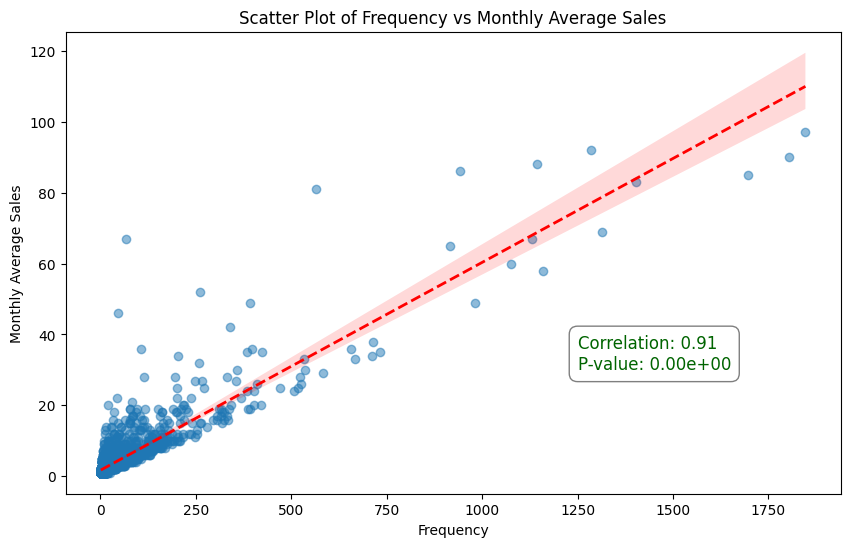

In [ ]:
# 총 판매수가 높은 판매자는 월별 평균 판매 건수가 높은가? - 상관분석
corr, p_value = stats.pearsonr(Frequency['frequency'], Frequency['monthly average sales'])

# Print correlation and p-value
print("상관계수:", corr.round(2))
print("p-value:", p_value)

# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='frequency', y='monthly average sales', data=Frequency, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 2, 'ls': '--'})
plt.xlabel('Frequency')
plt.ylabel('Monthly Average Sales')
plt.title('Scatter Plot of Frequency vs Monthly Average Sales')

# Annotating the correlation coefficient and p-value on the plot
plt.text(1250, 40, f'Correlation: {corr:.2f}\nP-value: {p_value:.2e}',
         fontsize=12, color='darkgreen', ha='left', va='top',
         bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))

plt.show()

### Revenue

#### 2.1 Monetary

In [ ]:
merged_revenue=pd.merge(order_items_merged_R,order_payments,on='order_id',how='left')
Monetary=merged_revenue.groupby('seller_id').agg({'payment_value':'sum'}).reset_index()
Monetary.columns=['seller_id','monetary']
Monetary

,seller_id,monetary
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,48349.22
2,002100f778ceb8431b7a1020ff7ab48f,2445.64
3,003554e2dce176b5555353e4f3555ac8,139.38
4,004c9cd9d87a3c30c522c48c4fc07416,27810.35
...,...,...
3048,ffc470761de7d0232558ba5e786e57b7,2519.44
3049,ffdd9f82b9a447f6f8d4b91554cc7dd3,3607.52
3050,ffeee66ac5d5a62fe688b9d26f83f534,2259.55
3051,fffd5413c0700ac820c7069d66d98c89,12700.50


,monetary
count,3053.00
mean,6602.09
std,21628.98
min,12.22
15%,173.49
30%,436.66
45%,995.93
50%,1258.80
60%,2085.41
75%,4916.18


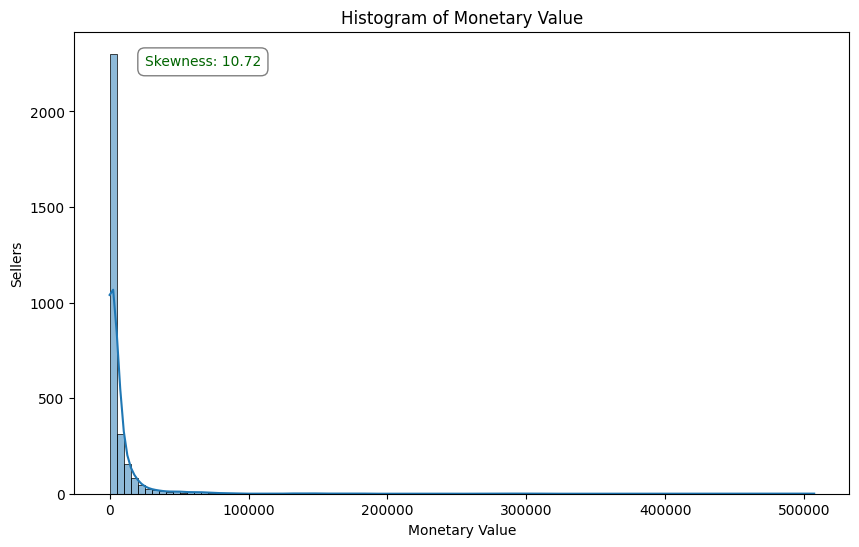

In [ ]:
# Monetary histogram

display(Monetary['monetary'].describe(percentiles=[0.15,0.3,0.45,0.6,0.75,0.9,0.95,0.99]).round(2))

plt.figure(figsize=(10, 6))
sns.histplot(Monetary['monetary'], kde=True, bins=100)
plt.xlabel('Monetary Value')
plt.ylabel('Sellers')
plt.title('Histogram of Monetary Value')

# skewness 계산 및 위치 조절
skewness_value = skew(Monetary['monetary'])
plt.text(x=Monetary['monetary'].quantile(0.95),  # 75% 분위에 위치
         y=plt.gca().get_ylim()[1] * 0.95,      # y축 상단에 위치
         s=f'Skewness: {skewness_value:.2f}',
         fontsize=10, color='darkgreen',
         ha='left', va='top',
         bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))

plt.show()

# 표준편차가 매우크다:  일부 판매자가 매우 높은 매출을 기록한 반면, 많은 판매자는 상대적으로 낮은 매출을 기록
# 14,679 이상의 매출을 기록한 판매자는 전체의 상위 10%
# 소수의 고매출 판매자가 전체 매출에 큰 영향을 미친다.
# 세분화하여 군집 모델에 학습시킬 때 스케일링 이전 로그 변환 필요해보인다.
# 고매출 판매자와 저매출 판매자를 식별해서 맞춤 전략을 세울 필요 있어 보인다.


In [ ]:
monthly_revenue = merged_revenue.groupby(['seller_id', 'sell_month'])['payment_value'].sum().reset_index()
monthly_revenue.head()

,seller_id,sell_month,payment_value
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09,916.02
1,0015a82c2db000af6aaaf3ae2ecb0532,2017-10,1832.04
2,001cca7ae9ae17fb1caed9dfb1094831,2017-02,4075.00
3,001cca7ae9ae17fb1caed9dfb1094831,2017-03,4468.22
4,001cca7ae9ae17fb1caed9dfb1094831,2017-04,2894.44


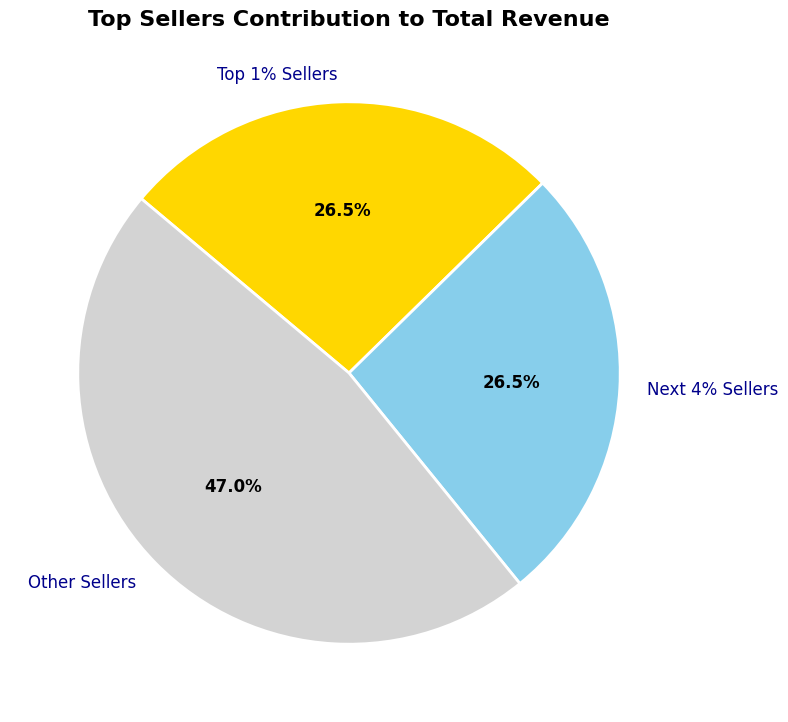

In [ ]:
# 전체 매출 계산
total_revenue = merged_revenue['payment_value'].sum()
total_monetary = merged_revenue.groupby('seller_id')['payment_value'].sum().reset_index()
# 매출 상위 1% 판매자 계산
threshold_1_percent = total_monetary['payment_value'].quantile(0.99)
top_1_percent_sellers = total_monetary[total_monetary['payment_value'] >= threshold_1_percent]
top_1_percent_revenue = top_1_percent_sellers['payment_value'].sum()

# 매출 상위 5% 판매자 계산 (상위 1% 제외)
threshold_5_percent = total_monetary['payment_value'].quantile(0.95)
top_5_percent_sellers = total_monetary[(total_monetary['payment_value'] >= threshold_5_percent) & (total_monetary['payment_value'] < threshold_1_percent)]
top_5_percent_revenue = top_5_percent_sellers['payment_value'].sum()

other_sellers_revenue = total_revenue - top_1_percent_revenue - top_5_percent_revenue

labels = ['Top 1% Sellers', 'Next 4% Sellers', 'Other Sellers']
sizes = [top_1_percent_revenue, top_5_percent_revenue, other_sellers_revenue]
colors = ['gold', 'skyblue', 'lightgray']

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, counterclock=False,
                                   wedgeprops={'edgecolor': 'white', 'linewidth': 2})


plt.title(f'Top Sellers Contribution to Total Revenue', fontsize=16, fontweight='bold')

for text in texts:
    text.set_fontsize(12)
    text.set_color('darkblue')

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()


In [ ]:

# 상위 1% 판매자 계산
threshold_1_percent = total_monetary['payment_value'].quantile(0.99)
top_1_percent_sellers = total_monetary[total_monetary['payment_value'] >= threshold_1_percent]['seller_id']

# 상위 5% 판매자 계산 (상위 1% 제외)
threshold_5_percent = total_monetary['payment_value'].quantile(0.95)
top_5_percent_sellers = total_monetary[(total_monetary['payment_value'] >= threshold_5_percent) & (total_monetary['payment_value'] < threshold_1_percent)]['seller_id']

# 나머지 판매자 계산
other_sellers = total_monetary[total_monetary['payment_value'] < threshold_5_percent]['seller_id']


recency_data = Recency[['seller_id', 'recency']]
frequency_data = Frequency[['seller_id', 'frequency']]


top_1_percent_recency = recency_data[recency_data['seller_id'].isin(top_1_percent_sellers)]['recency'].mean()
top_5_percent_recency = recency_data[recency_data['seller_id'].isin(top_5_percent_sellers)]['recency'].mean()
other_recency = recency_data[recency_data['seller_id'].isin(other_sellers)]['recency'].mean()

top_1_percent_frequency = frequency_data[frequency_data['seller_id'].isin(top_1_percent_sellers)]['frequency'].mean()
top_5_percent_frequency = frequency_data[frequency_data['seller_id'].isin(top_5_percent_sellers)]['frequency'].mean()
other_frequency = frequency_data[frequency_data['seller_id'].isin(other_sellers)]['frequency'].mean()

summary_data = pd.DataFrame({
    'Group': ['Top 1% Sellers', 'Next 4% Sellers', 'Other Sellers'],
    'Recency': [top_1_percent_recency, top_5_percent_recency, other_recency],
    'Frequency': [top_1_percent_frequency, top_5_percent_frequency, other_frequency]
})
summary_data .head()

,Group,Recency,Frequency
0,Top 1% Sellers,18.387097,724.419355
1,Next 4% Sellers,27.745902,199.803279
2,Other Sellers,141.019310,18.175517


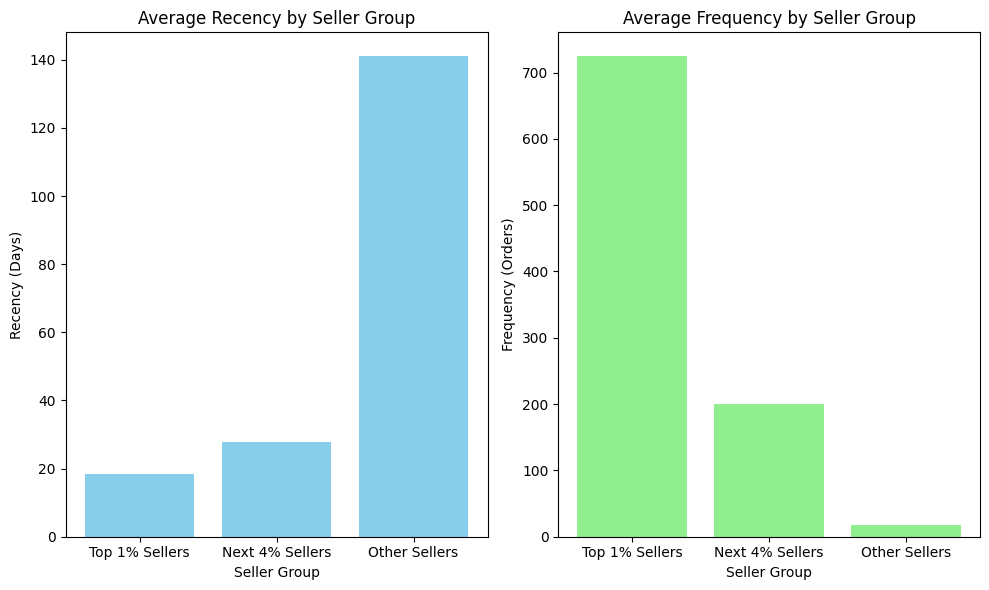

In [ ]:

# 시각화
plt.figure(figsize=(10, 6))

# Recency와 Frequency 각각의 바 그래프
plt.subplot(1, 2, 1)
plt.bar(summary_data['Group'], summary_data['Recency'], color='skyblue')
plt.title('Average Recency by Seller Group')
plt.xlabel('Seller Group')
plt.ylabel('Recency (Days)')

plt.subplot(1, 2, 2)
plt.bar(summary_data['Group'], summary_data['Frequency'], color='lightgreen')
plt.title('Average Frequency by Seller Group')
plt.xlabel('Seller Group')
plt.ylabel('Frequency (Orders)')

plt.tight_layout()
plt.show()

## 매출 상위 1% 판매자
# Recency 평균 18일로, 이 그룹의 판매자들은 최근에도 활발하게 거래를 하고 있음을 보여준다.
# Frequency 평균 724로, 매우 높은 빈도의 주문이 발생하고 있다

## 매출 1%-5% 판매자도 높은 수치를 보여주지만, 1%가 월등히 높게 나타난다.

## 나머지 판매자:
# Recency: 평균 141일로, 거래가 발생한 지 상당한 시간, 약 4-5달 정도의 시간이 지난 것을 보여준다.
# requency: 평균 18회로, 매우 낮은 빈도의 주문
# 매출 상위 그룹에 속하는 판매자들에게는 맞춤형 지원과 관리가 필요하며, 나머지 판매자들에 대해서는 추가적인 마케팅 노력과 고객 유치 전략이 필요함
# 고민이 되는 부분은 상위 5%의 매출을 가지는 판매자가 압도적으로 전체 매출의 상당 비율을 차지하는 점.


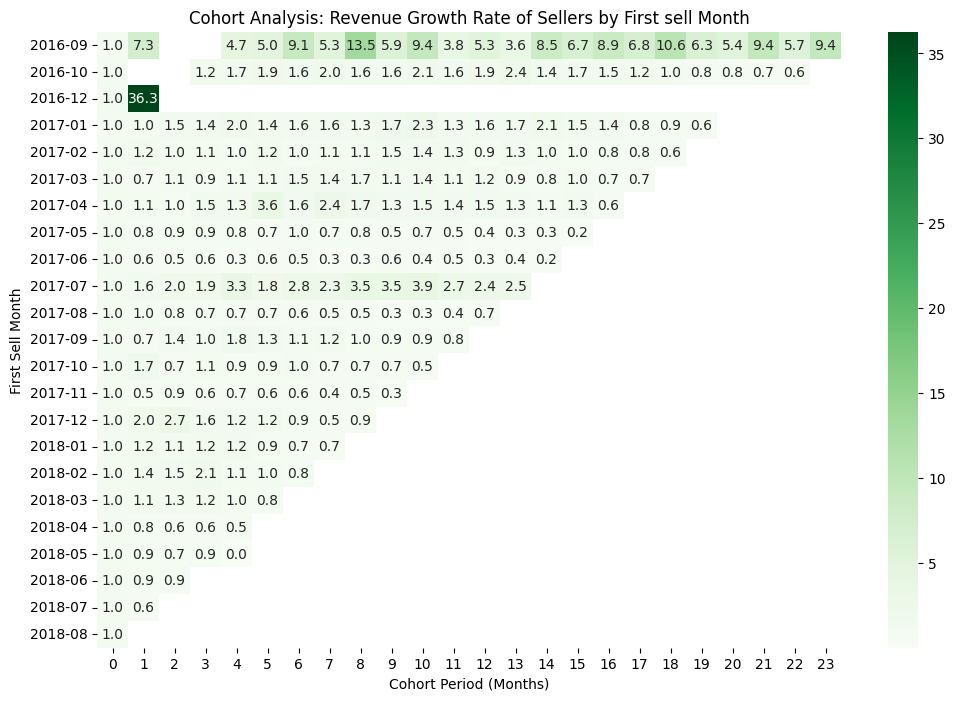

In [ ]:
# Revenue, 매출 성장 코호트(전월 대비 몇 배 상승)

# 첫달, 기존 판매달
cohort_revenue = merged_revenue.groupby(['first_sell_month', 'sell_month']).agg({'payment_value': 'sum'}).reset_index()

cohort_revenue['cohort_period'] = (cohort_revenue['sell_month'] - cohort_revenue['first_sell_month']).apply(lambda x: x.n)

cohort_revenue_pivot = cohort_revenue.pivot_table(index='first_sell_month', columns='cohort_period', values='payment_value')

cohort_revenue_size = cohort_revenue_pivot.iloc[:, 0]
revenue_growth_matrix = cohort_revenue_pivot.divide(cohort_revenue_size, axis=0)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(revenue_growth_matrix, annot=True, fmt=".1f", cmap="Greens")
plt.title('Cohort Analysis: Revenue Growth Rate of Sellers by First sell Month')
plt.xlabel('Cohort Period (Months)')
plt.ylabel('First Sell Month')
plt.show()

# 2017년 4월 코호트는 초기 4개월 동안 안정적인 매출을 유지하다가, 5개월 차에서 급격히 매출 상승
# 2017년 7월: 첫 판매를 시작한 코호트는 초기 몇 개월 동안 매우 강력한 매출 성과를 보인다.
# 3~10개월 차에서 다른 시기보다 높은 매출을 기록하고 있어, 이 시기의 외부 요인이 있을수도
# 2018년에 시작된 코호트는 전체적으로 매출 유지율이 낮아지고 있다, 018년 5월 이후 코호트는 매출 유지력이 매우 낮다.
# 시간이 지남에 따라 전반적으로 매출 유지율이 하락하고 있는 경향이 관찰된다.
#

In [ ]:
# 2016년 9월 첫 판매 게시 판매자
cohort_revenue[cohort_revenue['first_sell_month']=='2016-12']
711.74/19.62

36.27624872579001

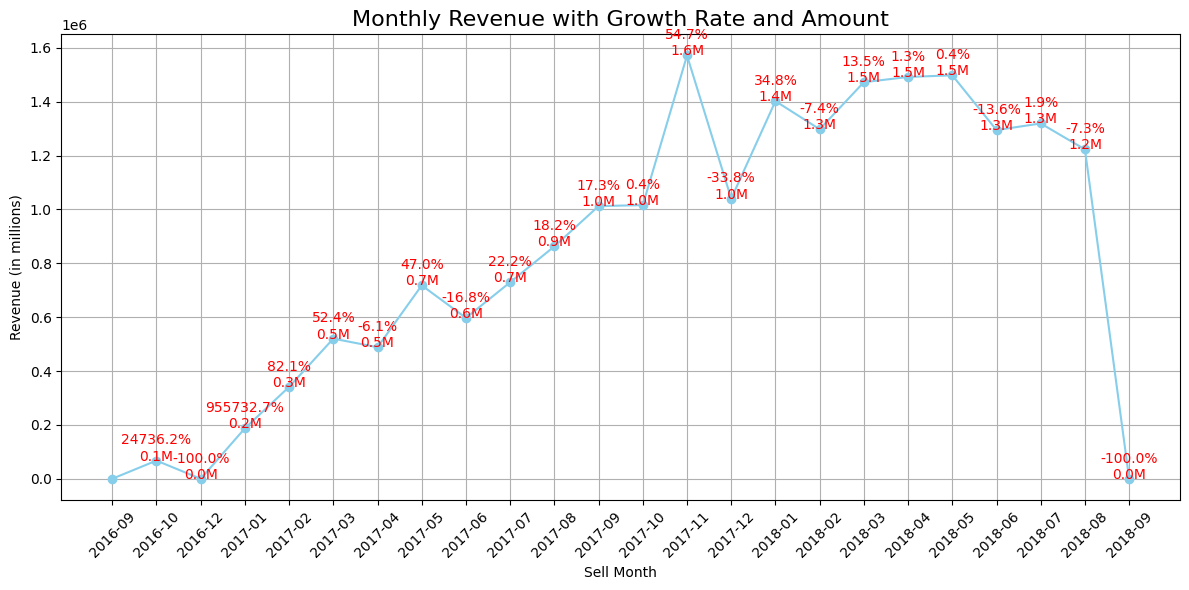

In [ ]:
# 코호트 확인 후 다시 매출 추이와 증감 확인
monthly_revenue = merged_revenue.groupby('sell_month')['payment_value'].sum().reset_index()

# 시각화
plt.figure(figsize=(12, 6))

# 월별 매출 변화 추이
plt.plot(monthly_revenue['sell_month'].astype(str), monthly_revenue['payment_value'], marker='o', color='skyblue')

# 증감률과 금액 표시
for i in range(1, len(monthly_revenue)):
    prev_value = monthly_revenue['payment_value'][i-1]
    curr_value = monthly_revenue['payment_value'][i]
    change_rate = (curr_value - prev_value) / prev_value * 100
    plt.text(i, curr_value, f'{change_rate:.1f}%\n{curr_value/1e6:.1f}M', fontsize=10, color='red', ha='center')

# 제목과 라벨 설정
plt.title('Monthly Revenue with Growth Rate and Amount', fontsize=16)
plt.xlabel('Sell Month')
plt.ylabel('Revenue (in millions)')
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.grid(True)
plt.show()

# 코호트에서 본 것처럼, 전체 2018년 월별 매출은 기존 2017년 보다 높은 편이지만,
# 기존 성장률에 비해 점점 성장이 떨어지고 있다.

# 리텐션 코호트를 보았을 때,  2018년 유입 판매자들의 리텐션은 상당히 높았다
# 리텐션이 높은데 매출 성장이 낮아지는 현상이 발생한다.
# 2018년의 신규 판매자 유입은 2017년에 비해 많이 성장하지 않았다 ->신규 판매자들의 기여도가 낮다면, 매출 성장 낮아짐
# 오래된 판매자들은 매출을 유지, 신규 판매자가 증가하지 않거나 이들의 매출 기여가 낮다면 전체 매출 성장률이 둔화
# 마케팅 및 프로모션 효과에 대한 측정도 향후 퍼널로 확인을 해봐야 한다.


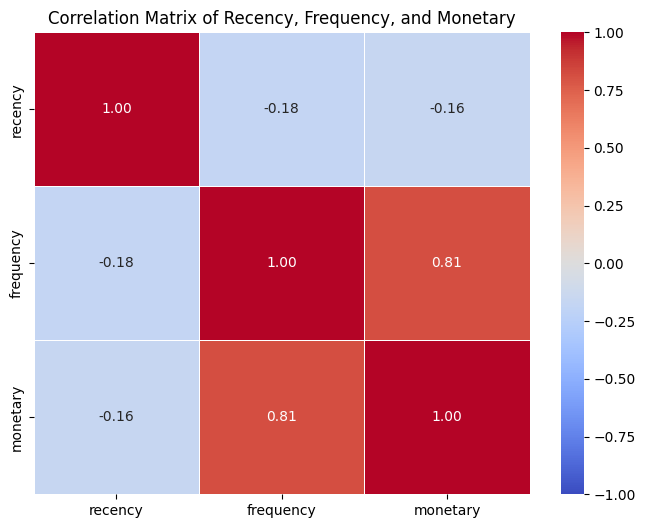

In [ ]:
# R,F,M 상관
rfm_data = pd.merge(Recency, Frequency, on='seller_id')
rfm_data = pd.merge(rfm_data, Monetary, on='seller_id')

correlation_matrix = rfm_data[['recency', 'frequency', 'monetary']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Recency, Frequency, and Monetary')
plt.show()

# F와 M의 경우 높은 상관관계가 나타나 다중 공선성 가능성 있음
# 향후 F와 M을 로그 변환을 하고, 표준화 하기전 한 feature에 대해 *0.5 정도를 곱해서 살짝 약화시킬 필요도 있겠다.

#### 2.2 Payment_type

In [ ]:
# 판매월이 한 달 + 두 달인 유저 vs  중기 유저 vs 장기 유저

# 제품 다양성: Product Variety

# 배송 관련
# order_items_merged_R[order_items_merged_R['order_status']=='shipped']
# order_items_merged_R[order_items_merged_R['order_delivered_customer_date'].isna()]

In [ ]:
# payment_type 관련
# 어떤 판매자의 고객들이 주로 신용카드를 사용한다면, 해당 판매자는 신용카드 사용 고객에게 더 맞춤형 마케팅을 진행
#.일부 결제 방식은 구매를 촉진하는 데 더 효과적일 수 있으며, 판매자는 이 정보를 바탕으로 결제 프로모션을 최적화
#


In [ ]:
seller_payment_type=pd.merge(order_payments,order_items_merged_R,on='order_id',how='left').groupby(['seller_id','payment_type'])['order_id'].nunique().unstack().reset_index().fillna(0).sort_values('voucher',ascending=False)
seller_payment_type.reset_index(drop=True,inplace=True)
seller_payment_type.tail()

payment_type,seller_id,credit_card,boleto,debit_card,voucher
3048,651fe66032c9520ee5587f694908040d,7.0,0.0,0.0,0.0
3049,6524b847b982cd56bb5d4b02b776ee42,0.0,1.0,0.0,0.0
3050,6548c2550b6e2d8f18053216e1c7b6f3,2.0,1.0,0.0,0.0
3051,655220df33262c7e0c4949a147366f94,13.0,0.0,0.0,0.0
3052,ffff564a4f9085cd26170f4732393726,11.0,5.0,0.0,0.0


In [ ]:
seller_payment_type

# 브라질 olist_store 결제 성향에 대한 사전조사:
# Credit Card는 브라질에서 가장 널리 사용되는 결제 방식으로, 특히 할부 결제 옵션이 중요
# Boleto는 은행 계좌 없이도 사용 가능한 후불 결제 방식으로, 금융 접근성이 낮은 고객층에서 인기가 있다.
# Debit Card는 즉시 결제가 이루어지는 방식으로, 예산 관리가 중요한 고객들에게 선호된다.
# Voucher는 주로 프로모션 또는 리워드 형태로 제공되는 선불 결제 수단으로, 특정 상점이나 캠페인에서 많이 사용된다.

payment_type,seller_id,credit_card,boleto,debit_card,voucher
0,6560211a19b47992c3666cc44a7e94c0,1386.0,385.0,28.0,92.0
1,4a3ca9315b744ce9f8e9374361493884,1432.0,311.0,20.0,89.0
2,cc419e0650a3c5ba77189a1882b7556a,1244.0,377.0,18.0,87.0
3,7a67c85e85bb2ce8582c35f2203ad736,895.0,235.0,6.0,50.0
4,1f50f920176fa81dab994f9023523100,987.0,376.0,21.0,47.0
...,...,...,...,...,...
3048,651fe66032c9520ee5587f694908040d,7.0,0.0,0.0,0.0
3049,6524b847b982cd56bb5d4b02b776ee42,0.0,1.0,0.0,0.0
3050,6548c2550b6e2d8f18053216e1c7b6f3,2.0,1.0,0.0,0.0
3051,655220df33262c7e0c4949a147366f94,13.0,0.0,0.0,0.0


In [ ]:
# 마지막 행 판매자의 주문 지불된 결제 수단 횟수와 주문수가 일치하는가? - 일치
order_items_merged_R[order_items_merged_R['seller_id']=='ffff564a4f9085cd26170f4732393726']['order_id'].nunique()

16

In [ ]:
order_items[order_items['seller_id']=='ffff564a4f9085cd26170f4732393726'].merge(order_payments,on='order_id',how='left').sort_values('payment_type').nunique()
# 주문 건수 20개 차이가 나는 이유는 주문 취소와 주문 불가 를 제외하지 않았기 때문 -> 검증함

,0
order_id,20
order_item_id,1
product_id,15
seller_id,1
shipping_limit_date,20
price,15
freight_value,18
payment_sequential,1
payment_type,2
payment_installments,5


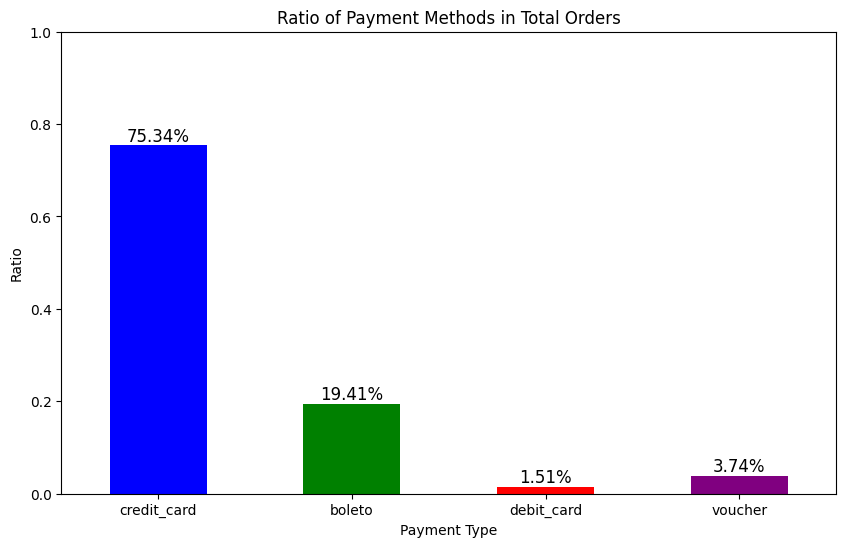

In [ ]:
# 전체 주문 수 계산
total_orders = seller_payment_type[['credit_card', 'boleto', 'debit_card', 'voucher']].sum()

order_ratios = total_orders / total_orders.sum()

plt.figure(figsize=(10, 6))
order_ratios.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Ratio of Payment Methods in Total Orders')
plt.xlabel('Payment Type')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.ylim(0, 1)

for i, v in enumerate(order_ratios):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center', fontsize=12)

plt.show()

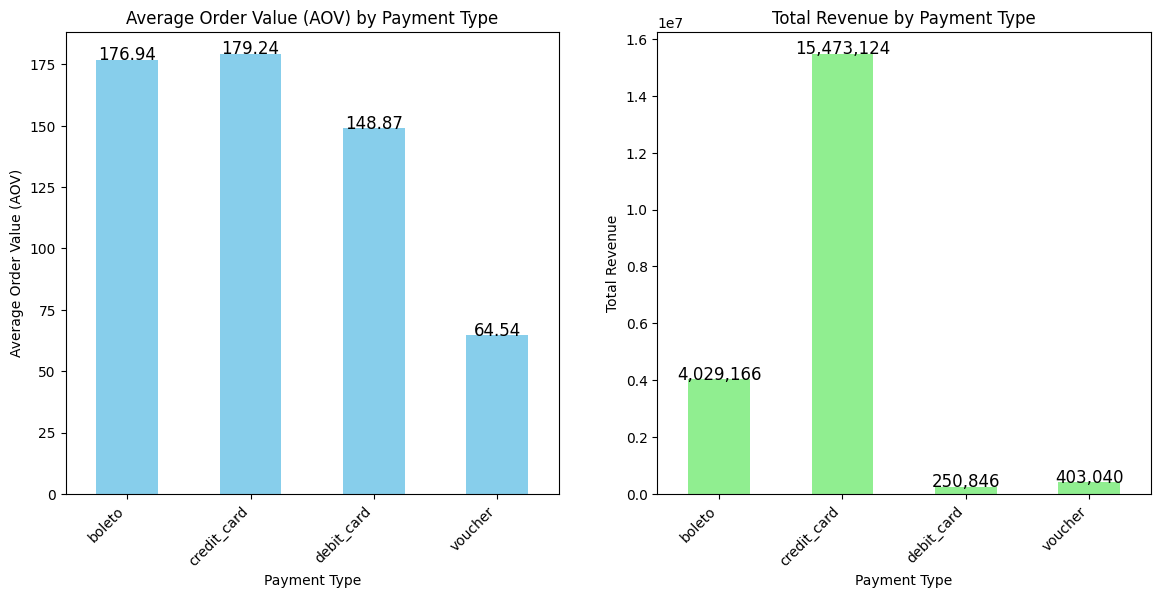

In [ ]:
# 결제 수단별로 평균 매출이 차이가 있을까?
type_paymnet_aov=order_items_merged_R.merge(order_payments,on='order_id',how='left').groupby('payment_type')['payment_value'].mean().round(2)
type_paymnet_revenue=order_items_merged_R.merge(order_payments,on='order_id',how='left').groupby('payment_type')['payment_value'].sum().round(2)


#
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# : 결제 수단별 평균 주문 가치 (AOV)
type_paymnet_aov.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average Order Value (AOV) by Payment Type')
axes[0].set_xlabel('Payment Type')
axes[0].set_ylabel('Average Order Value (AOV)')
axes[0].set_xticklabels(type_paymnet_aov.index, rotation=45, ha='right')
for i, v in enumerate(type_paymnet_aov):
    axes[0].text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=12)

#  결제 수단별 총 매출
type_paymnet_revenue.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Total Revenue by Payment Type')
axes[1].set_xlabel('Payment Type')
axes[1].set_ylabel('Total Revenue')
axes[1].set_xticklabels(type_paymnet_revenue.index, rotation=45, ha='right')
for i, v in enumerate(type_paymnet_revenue):
    axes[1].text(i, v + 100, f'{v:,.0f}', ha='center', fontsize=12)

plt.show()

# Credit Card는 평균 가치와 총 매출 모두 가장 높은 지배적인 결제수단이다.
#  Boleto의 높은 AOV 대비 낮은 총 매출, 사용 비중은 20% 정도이지만 구매력이 있는 결제수
#  Voucher 사용자는 소액 상품을 구매하는 경향
# Debit Card의 경우 aov가 voucher보다 2배 이상 높지만, 총 매출은 낮다.

# -> 결제 수단이 특정 고객 세그먼트에서 차별적으로 사용되고 있을 수 있다.
# ->

In [ ]:
import math

# 각 결제 수단의 사용 비율 계산
seller_payment_type['total'] = seller_payment_type[['credit_card', 'boleto', 'debit_card', 'voucher']].sum(axis=1)
seller_payment_type['credit_card_ratio'] = seller_payment_type['credit_card'] / seller_payment_type['total']
seller_payment_type['boleto_ratio'] = seller_payment_type['boleto'] / seller_payment_type['total']
seller_payment_type['debit_card_ratio'] = seller_payment_type['debit_card'] / seller_payment_type['total']
seller_payment_type['voucher_ratio'] = seller_payment_type['voucher'] / seller_payment_type['total']

# 결제 혼합 지수: 여러 결제 수단을 사용하는 비율에 따라 혼합 지수
#  결제 수단이 얼마나 다양하게 사용되었는지를 나타내며, 다양성이 클수록 엔트로피 값이 높아진다.

def entropy(row):
    ratios = row[['credit_card_ratio', 'boleto_ratio', 'debit_card_ratio', 'voucher_ratio']]
    ratios = ratios[ratios > 0]  # 0인 비율은 제외
    entropy = -sum(ratio * math.log2(ratio) for ratio in ratios)
    return entropy

seller_payment_type['payment_mix_index'] = seller_payment_type.apply(entropy, axis=1).round(2)

# 결제 집중도(Payment Concentration)
# 특정 결제 수단에 집중된 정도를 나타내는 지표로, 하나의 결제 수단에 주로 의존하는 판매자를 식별

seller_payment_type['payment_concentration'] = seller_payment_type[['credit_card_ratio', 'boleto_ratio', 'debit_card_ratio', 'voucher_ratio']].max(axis=1).round(2)

# 필요한 컬럼만 출력
seller_payment_type.sort_values('payment_mix_index',ascending=False)

payment_type,seller_id,credit_card,boleto,debit_card,voucher,total,credit_card_ratio,boleto_ratio,debit_card_ratio,voucher_ratio,payment_mix_index,payment_concentration
1016,39d61be7a92eb77b7da367bd4845bc0e,2.0,3.0,1.0,1.0,7.0,0.285714,0.428571,0.142857,0.142857,1.84,0.43
787,c3aad7dc65449ae90a5e9c3c6c1e78e0,3.0,2.0,1.0,1.0,7.0,0.428571,0.285714,0.142857,0.142857,1.84,0.43
934,f35becee938e982bd615edf8ef12bcfb,3.0,1.0,1.0,1.0,6.0,0.500000,0.166667,0.166667,0.166667,1.79,0.50
963,186cdd1b2df32caa72cfb410bba768d3,3.0,1.0,1.0,1.0,6.0,0.500000,0.166667,0.166667,0.166667,1.79,0.50
423,c70a353f02429c00775a46a75fb787da,4.0,1.0,1.0,2.0,8.0,0.500000,0.125000,0.125000,0.250000,1.75,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
1952,2a73cba571d90c694b7caca072ccf6ce,0.0,1.0,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,-0.00,1.00
1951,2a61c271b1ac763450d846849783e922,17.0,0.0,0.0,0.0,17.0,1.000000,0.000000,0.000000,0.000000,-0.00,1.00
1949,2a50b7ee5aebecc6fd0ff9784a4747d6,1.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,0.000000,-0.00,1.00
1948,2a167ca73899c85001a837d8fb4962f6,2.0,0.0,0.0,0.0,2.0,1.000000,0.000000,0.000000,0.000000,-0.00,1.00


In [ ]:
# 혼합 지수와 집중 지수 상관관계
corr, p_value = stats.pearsonr(seller_payment_type['payment_mix_index'], seller_payment_type['payment_concentration'])
print("상관계수:", corr.round(2))
print("p-value:", p_value)


상관계수: -0.91
p-value: 0.0


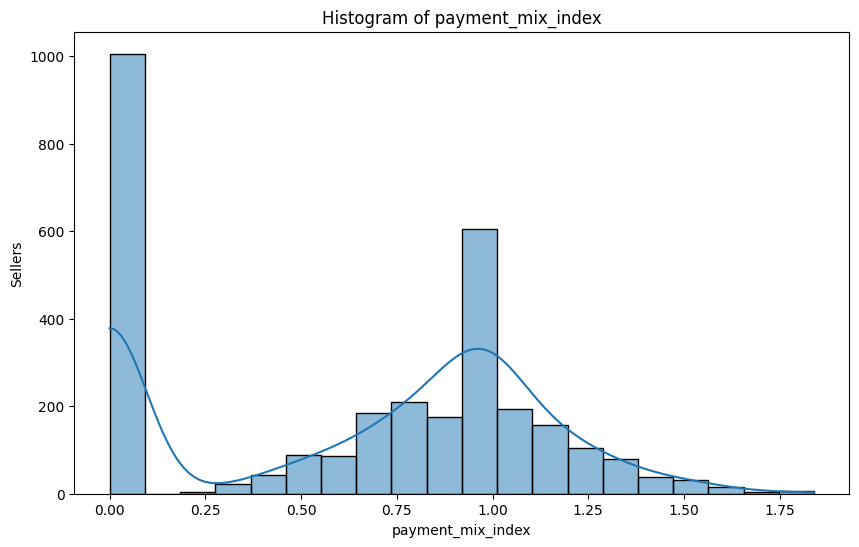

In [ ]:
# 혼합 지수 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(seller_payment_type['payment_mix_index'], kde=True, bins=20)
plt.xlabel('payment_mix_index')
plt.ylabel('Sellers')
plt.title('Histogram of payment_mix_index')
plt.show()

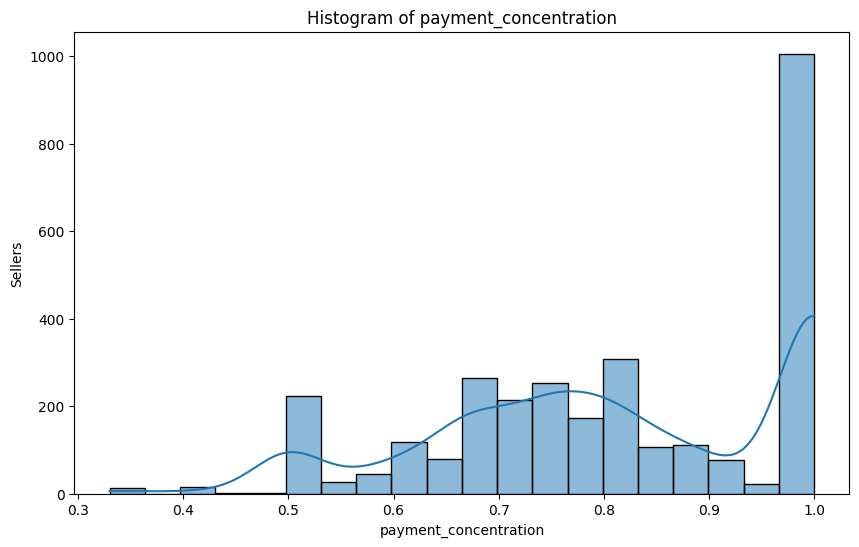

In [ ]:
# 집중 지수 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(seller_payment_type['payment_concentration'], kde=True, bins=20)
plt.xlabel('payment_concentration')
plt.ylabel('Sellers')
plt.title('Histogram of payment_concentration')
plt.show()

### Delivery_delay count,delay rate

In [ ]:
order_items_merged_R.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112101 entries, 0 to 112649
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112101 non-null  object        
 1   order_item_id                  112101 non-null  int64         
 2   product_id                     112101 non-null  object        
 3   seller_id                      112101 non-null  object        
 4   shipping_limit_date            112101 non-null  datetime64[ns]
 5   price                          112101 non-null  float64       
 6   freight_value                  112101 non-null  float64       
 7   customer_id                    112101 non-null  object        
 8   order_status                   112101 non-null  object        
 9   order_purchase_timestamp       112101 non-null  datetime64[ns]
 10  order_approved_at              112086 non-null  datetime64[ns]
 11  order

In [ ]:
# 4 배송 상태 및 배송 시간

# 4.1 실제 수령 - 기대 수령 기간 < 0 지연된 주문, 지연 여부 컬럼, 지연 시간 컬럼 추가
order_items_merged_R['delay'] = (order_items_merged_R['order_delivered_customer_date'] - order_items_merged_R['order_estimated_delivery_date']).dt.days
order_items_merged_R['is_delayed'] = order_items_merged_R['delay'] > 0

# 지연 여부와 지연 시간 컬럼 추가 확인
order_items_merged_R[['order_id', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'delay', 'is_delayed']].head()


,order_id,order_delivered_customer_date,order_estimated_delivery_date,delay,is_delayed
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-20 23:43:48,2017-09-29,-9.0,False
1,00018f77f2f0320c557190d7a144bdd3,2017-05-12 16:04:24,2017-05-15,-3.0,False
2,000229ec398224ef6ca0657da4fc703e,2018-01-22 13:19:16,2018-02-05,-14.0,False
3,00024acbcdf0a6daa1e931b038114c75,2018-08-14 13:32:39,2018-08-20,-6.0,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-03-01 16:42:31,2017-03-17,-16.0,False


In [ ]:

unique_orders = order_items_merged_R.drop_duplicates(subset=['order_id', 'seller_id'])
all_sellers=unique_orders['seller_id'].unique()

# 판매자 지연 건수
delayed_deliveries = unique_orders[unique_orders['is_delayed']].groupby('seller_id').size().reset_index(name='delayed_count')

delayed_deliveries_full = pd.DataFrame(all_sellers, columns=['seller_id']).merge(
    delayed_deliveries, on='seller_id', how='left'
).fillna(0)

delayed_deliveries_full['delayed_count'] = delayed_deliveries_full['delayed_count'].astype(int)

total_orders_per_seller = unique_orders.groupby('seller_id').size().reset_index(name='total_orders')

delayed_deliveries_full = delayed_deliveries_full.merge(total_orders_per_seller, on='seller_id')

# 판매자 지연율
delayed_deliveries_full['delay_rate'] = (delayed_deliveries_full['delayed_count'] / delayed_deliveries_full['total_orders']).round(2)

delayed_deliveries_full.head()

,seller_id,delayed_count,total_orders,delay_rate
0,48436dade18ac8b2bce089ec2a041202,10,138,0.07
1,dd7ddc04e1b6c2c614352b383efe2d36,15,122,0.12
2,5b51032eddd242adc84c38acab88f23d,0,12,0.00
3,9d7a1d34a5052409006425275ba1c2b4,1,13,0.08
4,df560393f3a51e74553ab94004ba5c87,2,28,0.07


In [ ]:
delayed_deliveries_full['total_orders'].sum()

99542

In [ ]:
delayed_deliveries_full.describe(percentiles=[0.15,0.3,0.45,0.6,0.75,0.9,0.95,0.99]).round(2)
# 배송 지연 수 상위 90% 구간: 4개 이상 배송 지연
# 배송 지연율 상위 90% 구간: 0.17이상의 지연율

,delayed_count,total_orders,delay_rate
count,3053.00,3053.00,3053.00
mean,2.14,32.60,0.06
std,7.92,105.57,0.15
min,0.00,1.00,0.00
15%,0.00,1.00,0.00
30%,0.00,3.00,0.00
45%,0.00,5.00,0.00
50%,0.00,7.00,0.00
60%,1.00,10.00,0.02
75%,1.00,22.00,0.07


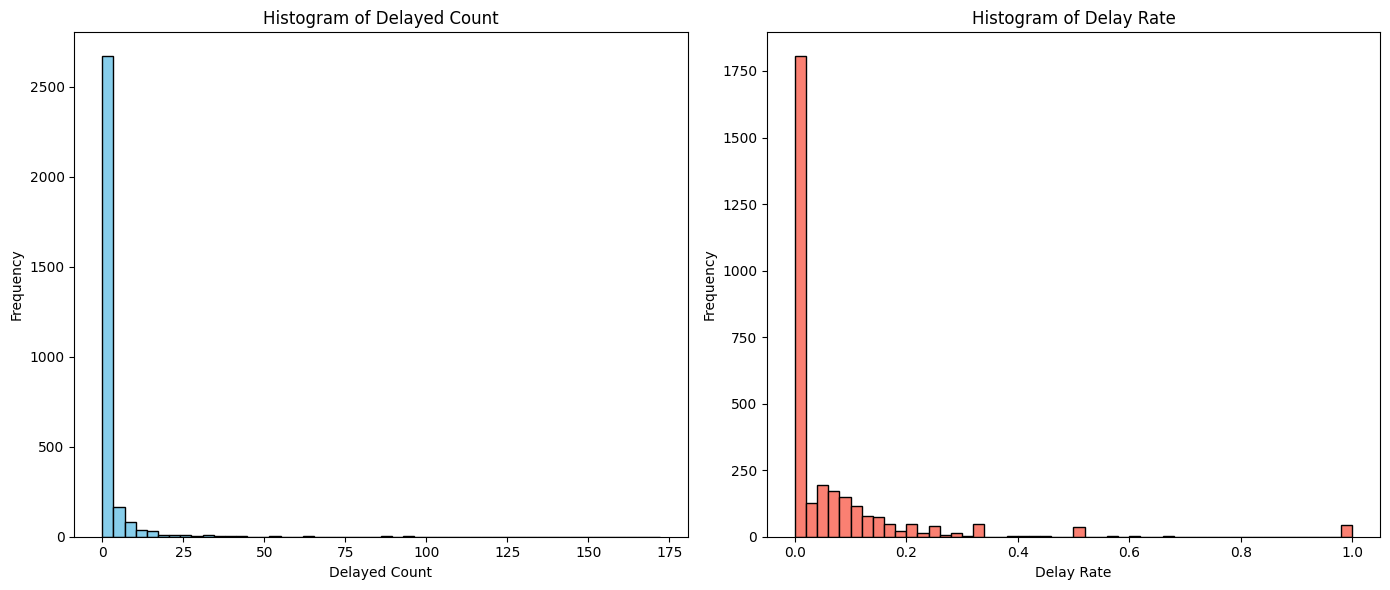

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].hist(delayed_deliveries_full['delayed_count'], bins=50, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Delayed Count')
axs[0].set_xlabel('Delayed Count')
axs[0].set_ylabel('Frequency')

axs[1].hist(delayed_deliveries_full['delay_rate'], bins=50, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of Delay Rate')
axs[1].set_xlabel('Delay Rate')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

상관계수: 0.0
p-value: 0.8627926119635599


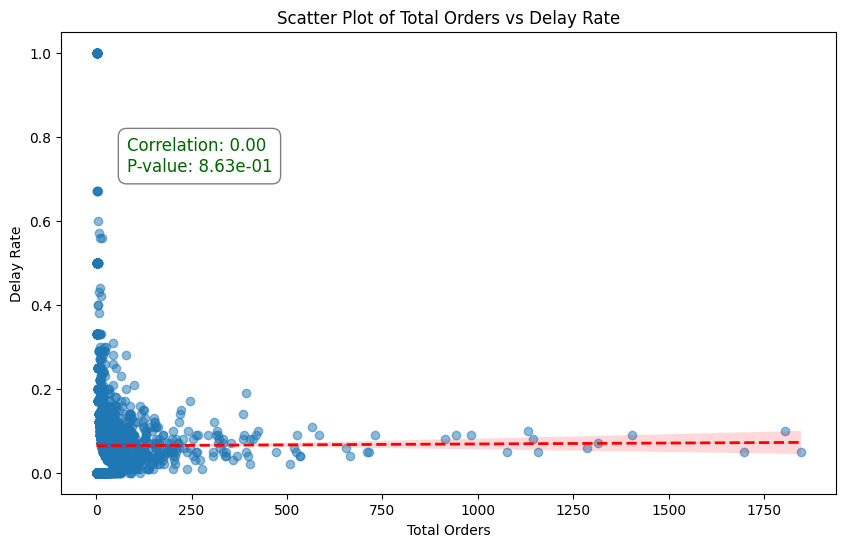

In [ ]:
# 총 주문 건수와 지연율의 상관관계 분석
# 주문 건수와 지연율 간엔 유의미한 상관관계가 존재하지 않음 x
corr, p_value = stats.pearsonr(delayed_deliveries_full['total_orders'], delayed_deliveries_full['delay_rate'])


print("상관계수:", corr.round(2))
print("p-value:", p_value)


plt.figure(figsize=(10, 6))
sns.regplot(x='total_orders', y='delay_rate', data=delayed_deliveries_full, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 2, 'ls': '--'})
plt.xlabel('Total Orders')
plt.ylabel('Delay Rate')
plt.title('Scatter Plot of Total Orders vs Delay Rate')

plt.text(80, 0.8, f'Correlation: {corr:.2f}\nP-value: {p_value:.2e}',
         fontsize=12, color='darkgreen', ha='left', va='top',
         bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))

plt.show()

In [ ]:
seller_metrics = pd.merge(Recency, Frequency, on='seller_id', how='inner')
seller_metrics = pd.merge(seller_metrics, Monetary, on='seller_id', how='inner')
seller_metrics = pd.merge(seller_metrics, delayed_deliveries_full, on='seller_id', how='inner')
seller_metrics=seller_metrics[['seller_id','months_with_sale','recency','frequency','monetary','delayed_count','total_orders','delay_rate']]
seller_metrics.head()

,seller_id,months_with_sale,recency,frequency,monetary,delayed_count,total_orders,delay_rate
0,0015a82c2db000af6aaaf3ae2ecb0532,2,315,3,2748.06,0,3,0.00
1,001cca7ae9ae17fb1caed9dfb1094831,17,47,200,48349.22,12,200,0.06
2,002100f778ceb8431b7a1020ff7ab48f,8,139,51,2445.64,9,51,0.18
3,003554e2dce176b5555353e4f3555ac8,1,257,1,139.38,0,1,0.00
4,004c9cd9d87a3c30c522c48c4fc07416,17,118,158,27810.35,10,158,0.06


In [ ]:
seller_metrics.seller_id.nunique()

3053

In [ ]:
# 지연율이 높은 상위 10%(0.17) 인원과 다른 인원의 성과 비교

top_10_percent = seller_metrics[seller_metrics['delay_rate'] >= seller_metrics['delay_rate'].quantile(0.9)]

bottom_90_percent = seller_metrics[seller_metrics['delay_rate'] < seller_metrics['delay_rate'].quantile(0.9)]

# 각 그룹의 평균 RFM 지표
top_10_metrics = top_10_percent[['recency', 'frequency', 'monetary']].mean().reset_index(name='Top 10%')
bottom_90_metrics = bottom_90_percent[['recency', 'frequency', 'monetary']].mean().reset_index(name='Bottom 90%')


comparison_metrics = pd.merge(top_10_metrics, bottom_90_metrics, on='index')
comparison_metrics.columns = ['Metric', 'Top 10%', 'Bottom 90%']


In [ ]:
comparison_metrics

,Metric,Top 10%,Bottom 90%
0,recency,151.241590,133.329054
1,frequency,10.724771,35.229274
2,monetary,2947.726606,7040.450836


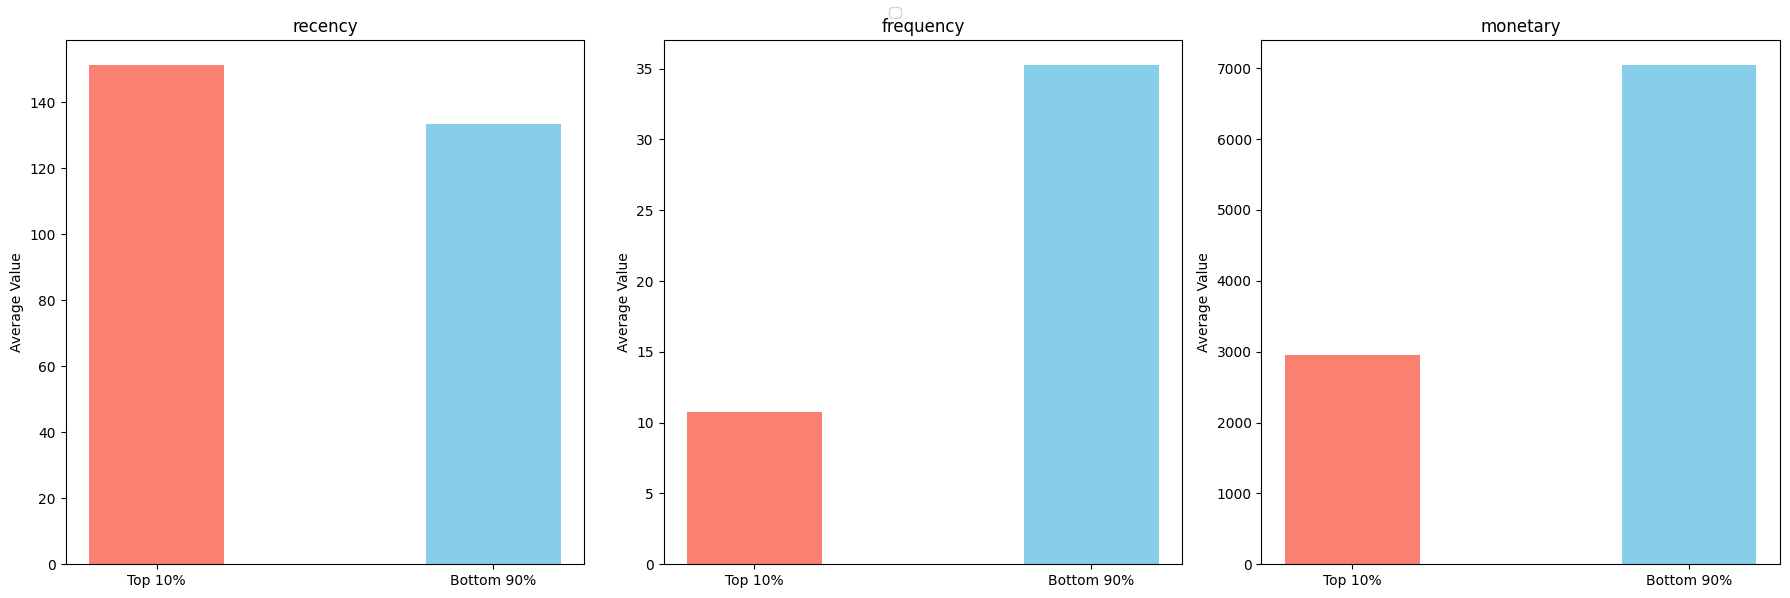

In [ ]:
# 주어진 변수명을 사용하여 시각화 코드 실행
metrics = comparison_metrics['Metric']
top_10 = comparison_metrics['Top 10%']
bottom_90 = comparison_metrics['Bottom 90%']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 각 Metric에 대한 막대 그래프를 생성
for i, metric in enumerate(metrics):
    axs[i].bar(0, top_10[i], width=0.4,  color='salmon', align='center')
    axs[i].bar(1, bottom_90[i], width=0.4, color='skyblue', align='center')
    axs[i].set_title(metric)
    axs[i].set_xticks([0, 1])
    axs[i].set_xticklabels(['Top 10%', 'Bottom 90%'])
    axs[i].set_ylabel('Average Value')

# 레전드 추가
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout()
plt.show()


# Recency: 상위 10%의 Recency 값이 더 높음, 판매가 최근까지 덜 이루어짐
# Frequency: 상위 10%의 구매 빈도가 나머지 90%에 비해 현저히 낮다. 이는 지연율이 높은 판매자들이 반복 구매를 유도하는 데 어려움 겪을 가능성 있음.
# Monetary: 상위 10%의 매출이 낮아, 지연율이 높은 판매자들이 매출 성과에서도 뒤처지는 것이 확인됨

#지연율 관리가 판매 성과에 중요한 영향을 미치며, 지연율이 높은 판매자들이 성과에서 뒤처지는 경향이 있다는 점이 확인됨



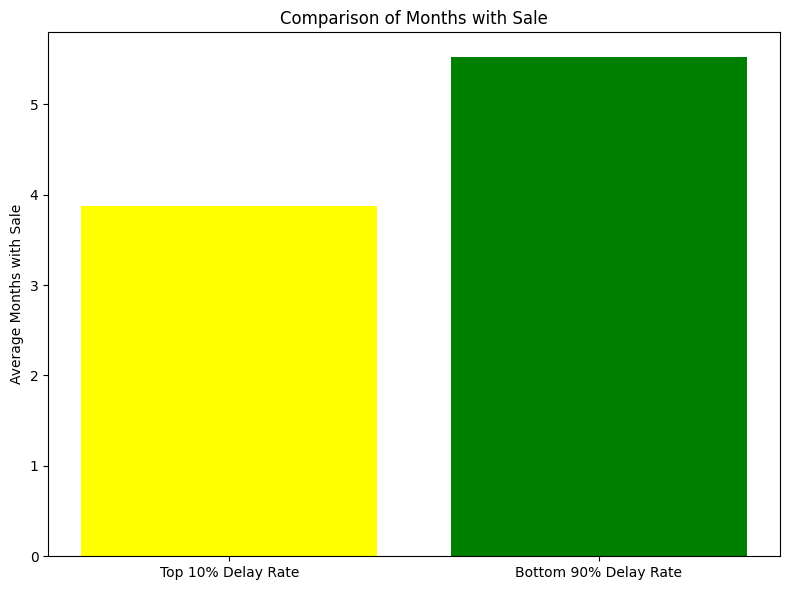

In [ ]:
# 지연율이 높은 집단은 판매 개월수 역시 점점 줄어 가는 양상을 보일 것이다.

# Calculating the average 'months_with_sale' for top 10% and bottom 90% sellers
top_10_months_with_sale = top_10_percent['months_with_sale'].mean()
bottom_90_months_with_sale = bottom_90_percent['months_with_sale'].mean()

# Creating a bar chart to compare 'months_with_sale' between Top 10% and Bottom 90%
labels = ['Top 10% Delay Rate', 'Bottom 90% Delay Rate']
values = [top_10_months_with_sale, bottom_90_months_with_sale]

plt.figure(figsize=(8, 6))
bars =plt.bar(labels, values, color=['yellow', 'green'])

plt.title('Comparison of Months with Sale')
plt.ylabel('Average Months with Sale')

plt.tight_layout()
plt.show()

# 판매가 활성화된 월 수의 경우:
# 지연율이 높았던 집단은 평균 판매 개월이 약 4개월
# 낮았던 집단은 약 5.5개월

# 배달 지연율이 높은 경우, 판매자가 지속하는 판매 월수도 작아진다
# 일반 구매 고객이 더 이상 구매를 하지 않아(Frequency) 판매 월수 감소로 인한 이탈 위험이 있다.

In [ ]:
temp=seller_payment_type[['seller_id','payment_mix_index','payment_concentration']]
temp

payment_type,seller_id,payment_mix_index,payment_concentration
0,6560211a19b47992c3666cc44a7e94c0,1.10,0.73
1,4a3ca9315b744ce9f8e9374361493884,1.00,0.77
2,cc419e0650a3c5ba77189a1882b7556a,1.11,0.72
3,7a67c85e85bb2ce8582c35f2203ad736,1.00,0.75
4,1f50f920176fa81dab994f9023523100,1.13,0.69
...,...,...,...
3048,651fe66032c9520ee5587f694908040d,-0.00,1.00
3049,6524b847b982cd56bb5d4b02b776ee42,-0.00,1.00
3050,6548c2550b6e2d8f18053216e1c7b6f3,0.92,0.67
3051,655220df33262c7e0c4949a147366f94,-0.00,1.00


In [ ]:
seller_metrics=pd.merge(seller_metrics,temp,on='seller_id',how='inner')
seller_metrics.drop('total_orders',inplace=True,axis=1)
seller_metrics

,seller_id,months_with_sale,recency,frequency,monetary,delayed_count,delay_rate,payment_mix_index,payment_concentration
0,0015a82c2db000af6aaaf3ae2ecb0532,2,315,3,2748.06,0,0.00,-0.00,1.00
1,001cca7ae9ae17fb1caed9dfb1094831,17,47,200,48349.22,12,0.06,0.94,0.77
2,002100f778ceb8431b7a1020ff7ab48f,8,139,51,2445.64,9,0.18,1.32,0.56
3,003554e2dce176b5555353e4f3555ac8,1,257,1,139.38,0,0.00,-0.00,1.00
4,004c9cd9d87a3c30c522c48c4fc07416,17,118,158,27810.35,10,0.06,0.88,0.79
...,...,...,...,...,...,...,...,...,...
3048,ffc470761de7d0232558ba5e786e57b7,7,11,28,2519.44,1,0.04,1.20,0.63
3049,ffdd9f82b9a447f6f8d4b91554cc7dd3,11,10,18,3607.52,0,0.00,1.19,0.68
3050,ffeee66ac5d5a62fe688b9d26f83f534,7,107,14,2259.55,2,0.14,0.94,0.64
3051,fffd5413c0700ac820c7069d66d98c89,14,2,59,12700.50,7,0.12,0.69,0.85


In [ ]:
seller_metrics

,seller_id,months_with_sale,recency,frequency,monetary,delayed_count,delay_rate,payment_mix_index,payment_concentration
0,0015a82c2db000af6aaaf3ae2ecb0532,2,315,3,2748.06,0,0.00,-0.00,1.00
1,001cca7ae9ae17fb1caed9dfb1094831,17,47,200,48349.22,12,0.06,0.94,0.77
2,002100f778ceb8431b7a1020ff7ab48f,8,139,51,2445.64,9,0.18,1.32,0.56
3,003554e2dce176b5555353e4f3555ac8,1,257,1,139.38,0,0.00,-0.00,1.00
4,004c9cd9d87a3c30c522c48c4fc07416,17,118,158,27810.35,10,0.06,0.88,0.79
...,...,...,...,...,...,...,...,...,...
3048,ffc470761de7d0232558ba5e786e57b7,7,11,28,2519.44,1,0.04,1.20,0.63
3049,ffdd9f82b9a447f6f8d4b91554cc7dd3,11,10,18,3607.52,0,0.00,1.19,0.68
3050,ffeee66ac5d5a62fe688b9d26f83f534,7,107,14,2259.55,2,0.14,0.94,0.64
3051,fffd5413c0700ac820c7069d66d98c89,14,2,59,12700.50,7,0.12,0.69,0.85


### Review_score

In [ ]:
review_score=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/seller_datamart_with_reviews.csv')
review_time=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/datamart_review_sheet1.xlsx')

In [ ]:
metrics_with_pro=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dev Final Project/data/seller_datamart_updated.csv')

In [ ]:
review_score.head()

,seller_id,avg_review_score,total_reviews
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667,3
1,001cca7ae9ae17fb1caed9dfb1094831,3.902542,236
2,001e6ad469a905060d959994f1b41e4f,1.000000,1
3,002100f778ceb8431b7a1020ff7ab48f,3.982143,56
4,003554e2dce176b5555353e4f3555ac8,5.000000,1


In [ ]:
review_time[['seller_id','review_answer_time']]

,seller_id,review_answer_time
0,0015a82c2db000af6aaaf3ae2ecb0532,14:32:42
1,0015a82c2db000af6aaaf3ae2ecb0532,23:15:15
2,0015a82c2db000af6aaaf3ae2ecb0532,1900-01-03 21:42:45
3,001cca7ae9ae17fb1caed9dfb1094831,1900-01-03 00:26:19
4,001cca7ae9ae17fb1caed9dfb1094831,1900-01-03 04:46:00
...,...,...
112311,ffff564a4f9085cd26170f4732393726,1900-01-05 10:59:56
112312,ffff564a4f9085cd26170f4732393726,11:14:57
112313,ffff564a4f9085cd26170f4732393726,1900-01-01 13:33:27
112314,ffff564a4f9085cd26170f4732393726,1900-01-03 10:40:13


In [ ]:
review_time2=review_time.copy()
# review_time2['review_answer_time']=pd.to_timedelta(review_time2['review_answer_time'])
review_time2['review_answer_time'] = review_time2['review_answer_time'].astype(str)
review_time2['review_answer_time'] = pd.to_datetime(review_time2['review_answer_time'], errors='coerce')

In [ ]:
review_time2['review_answer_time']

,review_answer_time
0,2024-08-31 14:32:42
1,2024-08-31 23:15:15
2,1900-01-03 21:42:45
3,1900-01-03 00:26:19
4,1900-01-03 04:46:00
...,...
112311,1900-01-05 10:59:56
112312,2024-08-31 11:14:57
112313,1900-01-01 13:33:27
112314,1900-01-03 10:40:13


In [ ]:
# 먼저 날짜형으로 변환했으나, 함수 인자로 사용하기 위해 다시 문자열로 변환
review_time2=review_time2[['seller_id','review_answer_time']]
review_time2['review_answer_time']=review_time2['review_answer_time'].astype(str)

In [ ]:
# Define the function to convert to timedelta
def convert_to_timedelta(time_str):
    try:

        if "2024-08-20" in time_str:

            time_delta = pd.to_datetime(time_str) - pd.Timestamp("2024-08-20")
        else:

            time_delta = pd.to_datetime(time_str) - pd.Timestamp("1900-01-01")
        return time_delta
    except Exception as e:
        return pd.NaT

review_time2['response_time_duration'] = review_time2['review_answer_time'].apply(convert_to_timedelta)

In [ ]:
# 70% 이내 범위에서 2일 이내 리뷰 응답이 이루어진다.
review_time2['response_time_duration'].describe(percentiles=[0.15,0.3,0.45,0.6,0.70,0.75,0.8,0.85,0.88,0.9,0.95,0.99])


,response_time_duration
count,112312
mean,11019 days 22:33:36.110433024
std,19499 days 20:33:44.475409664
min,0 days 00:00:03
15%,0 days 10:56:19
30%,0 days 21:46:22.799999999
45%,1 days 22:27:49
50%,2 days 02:03:21.500000
60%,2 days 19:14:41.399999999
70%,5 days 15:07:47.199999999


In [ ]:
# review_duration 기준으로 집계 준비
review_time2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112316 entries, 0 to 112315
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   seller_id               112316 non-null  object         
 1   review_answer_time      112316 non-null  object         
 2   response_time_duration  112312 non-null  timedelta64[ns]
dtypes: object(2), timedelta64[ns](1)
memory usage: 2.6+ MB


In [ ]:
# 1) 셀러별 평균 응답시간 2) 2일 이내 응답 건수 3) 2일 이내 응답 비율 구하기

aggregated_data = review_time2.groupby('seller_id').agg(
    within_2_days_count=('response_time_duration', lambda x: (x <= pd.Timedelta(days=2)).sum()),
    total_reviews=('response_time_duration', 'count'),
    avg_response_time=('response_time_duration', 'mean')
)

# Calculate the percentage of responses within 2 days
aggregated_data['within_2_days_rate'] = aggregated_data['within_2_days_count'] / aggregated_data['total_reviews']

# Reset index for better readability
aggregated_data = aggregated_data.reset_index()


In [ ]:
# 비율 반올림
aggregated_data['within_2_days_rate']=aggregated_data['within_2_days_rate'].round(2)

In [ ]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   seller_id            3053 non-null   object         
 1   within_2_days_count  3053 non-null   int64          
 2   total_reviews        3053 non-null   int64          
 3   avg_response_time    3049 non-null   timedelta64[ns]
 4   within_2_days_rate   3049 non-null   float64        
dtypes: float64(1), int64(2), object(1), timedelta64[ns](1)
memory usage: 119.4+ KB


In [ ]:
# 시행착오 코드, 기존 날짜에서 문제 생겨서 먼저 점수 합친 것
seller_metrics3=metrics_with_pro.merge(review_score,on='seller_id',how='left')
seller_metrics3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   seller_id              3053 non-null   object 
 1   months_with_sale       3053 non-null   int64  
 2   recency                3053 non-null   int64  
 3   frequency              3053 non-null   int64  
 4   monetary               3053 non-null   float64
 5   delayed_count          3053 non-null   int64  
 6   delay_rate             3053 non-null   float64
 7   payment_mix_index      3053 non-null   float64
 8   payment_concentration  3053 non-null   float64
 9   unique_category_count  3053 non-null   int64  
 10  avg_review_score       3049 non-null   float64
 11  total_reviews          3049 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 286.3+ KB


In [ ]:
# 4 개의 행에 대해서 0 채워널기
seller_metrics3.fillna(0,inplace=True)

In [ ]:
seller_metrics3['avg_review_score']=seller_metrics3['avg_review_score'].round(2)

In [ ]:
seller_metrics3.head()

,seller_id,months_with_sale,recency,frequency,monetary,delayed_count,delay_rate,payment_mix_index,payment_concentration,unique_category_count,avg_review_score,total_reviews
0,0015a82c2db000af6aaaf3ae2ecb0532,2,315,3,2748.06,0,0.00,-0.00,1.00,1,3.67,3.0
1,001cca7ae9ae17fb1caed9dfb1094831,17,47,200,48349.22,12,0.06,0.94,0.77,2,3.90,236.0
2,002100f778ceb8431b7a1020ff7ab48f,8,139,51,2445.64,9,0.18,1.32,0.56,1,3.98,56.0
3,003554e2dce176b5555353e4f3555ac8,1,257,1,139.38,0,0.00,-0.00,1.00,0,5.00,1.0
4,004c9cd9d87a3c30c522c48c4fc07416,17,118,158,27810.35,10,0.06,0.88,0.79,1,4.13,173.0


In [ ]:
seller_metrics4=seller_metrics3.merge(aggregated_data,on='seller_id',how='left')
seller_metrics4.head()

,seller_id,months_with_sale,recency,frequency,monetary,delayed_count,delay_rate,payment_mix_index,payment_concentration,unique_category_count,avg_review_score,total_reviews_x,within_2_days_count,total_reviews_y,avg_response_time,within_2_days_rate
0,0015a82c2db000af6aaaf3ae2ecb0532,2,315,3,2748.06,0,0.00,-0.00,1.00,1,3.67,3.0,0,3,30356 days 19:50:14,0.00
1,001cca7ae9ae17fb1caed9dfb1094831,17,47,200,48349.22,12,0.06,0.94,0.77,2,3.90,236.0,125,236,8876 days 23:11:56.423728768,0.53
2,002100f778ceb8431b7a1020ff7ab48f,8,139,51,2445.64,9,0.18,1.32,0.56,1,3.98,56.0,21,56,17889 days 13:41:46.285714176,0.38
3,003554e2dce176b5555353e4f3555ac8,1,257,1,139.38,0,0.00,-0.00,1.00,0,5.00,1.0,1,1,0 days 09:05:47,1.00
4,004c9cd9d87a3c30c522c48c4fc07416,17,118,158,27810.35,10,0.06,0.88,0.79,1,4.13,173.0,98,173,7634 days 20:03:39.710982656,0.57


In [ ]:
seller_metrics4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   seller_id              3053 non-null   object         
 1   months_with_sale       3053 non-null   int64          
 2   recency                3053 non-null   int64          
 3   frequency              3053 non-null   int64          
 4   monetary               3053 non-null   float64        
 5   delayed_count          3053 non-null   int64          
 6   delay_rate             3053 non-null   float64        
 7   payment_mix_index      3053 non-null   float64        
 8   payment_concentration  3053 non-null   float64        
 9   unique_category_count  3053 non-null   int64          
 10  avg_review_score       3053 non-null   float64        
 11  total_reviews_x        3053 non-null   float64        
 12  within_2_days_count    3053 non-null   int64    

In [ ]:
seller_metrics4.drop('total_reviews_y',axis=1,inplace=True)

In [ ]:
# seller_metrics4.to_csv('seller_metrics_all.csv',index=False)

In [ ]:
seller_metrics4.fillna(0,inplace=True)
# seller_metrics4.to_csv('seller_metrics_all_fillna.csv',index=False)

In [ ]:
seller_metrics4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   seller_id              3053 non-null   object 
 1   months_with_sale       3053 non-null   int64  
 2   recency                3053 non-null   int64  
 3   frequency              3053 non-null   int64  
 4   monetary               3053 non-null   float64
 5   delayed_count          3053 non-null   int64  
 6   delay_rate             3053 non-null   float64
 7   payment_mix_index      3053 non-null   float64
 8   payment_concentration  3053 non-null   float64
 9   unique_category_count  3053 non-null   int64  
 10  avg_review_score       3053 non-null   float64
 11  total_reviews_x        3053 non-null   float64
 12  within_2_days_count    3053 non-null   int64  
 13  avg_response_time      3053 non-null   object 
 14  within_2_days_rate     3053 non-null   float64
dtypes: f

In [ ]:
seller_metrics4['frequency'].describe(percentiles=[0.15,0.3,0.45,0.6,0.75,0.9,0.95,0.99])

,frequency
count,3053.000000
mean,32.604651
std,105.569649
min,1.000000
15%,1.000000
30%,3.000000
45%,5.000000
50%,7.000000
60%,10.000000
75%,22.000000


In [ ]:
seller_metrics4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   seller_id              3053 non-null   object 
 1   months_with_sale       3053 non-null   int64  
 2   recency                3053 non-null   int64  
 3   frequency              3053 non-null   int64  
 4   monetary               3053 non-null   float64
 5   delayed_count          3053 non-null   int64  
 6   delay_rate             3053 non-null   float64
 7   payment_mix_index      3053 non-null   float64
 8   payment_concentration  3053 non-null   float64
 9   unique_category_count  3053 non-null   int64  
 10  avg_review_score       3053 non-null   float64
 11  total_reviews_x        3053 non-null   float64
 12  within_2_days_count    3053 non-null   int64  
 13  avg_response_time      3053 non-null   object 
 14  within_2_days_rate     3053 non-null   float64
dtypes: f

In [ ]:
seller_metrics4[['delayed_count','delay_rate','within_2_days_rate','frequency','monetary','avg_review_score']].describe(percentiles=[0.15,0.3,0.45,0.6,0.75,0.9,0.95,0.99,0.995])

,delayed_count,delay_rate,within_2_days_rate,frequency,monetary,avg_review_score
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000
mean,2.144448,0.064271,0.466944,32.604651,6602.088300,4.003007
std,7.915786,0.147193,0.286018,105.569649,21628.978494,0.934998
min,0.000000,0.000000,0.000000,1.000000,12.220000,0.000000
15%,0.000000,0.000000,0.100000,1.000000,173.494000,3.200000
30%,0.000000,0.000000,0.360000,3.000000,436.662000,3.860000
45%,0.000000,0.000000,0.450000,5.000000,995.928000,4.090000
50%,0.000000,0.000000,0.470000,7.000000,1258.800000,4.180000
60%,1.000000,0.020000,0.500000,10.000000,2085.414000,4.330000
75%,1.000000,0.070000,0.600000,22.000000,4916.180000,4.620000


In [ ]:
seller_metrics4

,seller_id,months_with_sale,recency,frequency,monetary,delayed_count,delay_rate,payment_mix_index,payment_concentration,unique_category_count,avg_review_score,total_reviews_x,within_2_days_count,avg_response_time,within_2_days_rate
0,0015a82c2db000af6aaaf3ae2ecb0532,2,315,3,2748.06,0,0.00,-0.00,1.00,1,3.67,3.0,0,30356 days 19:50:14,0.00
1,001cca7ae9ae17fb1caed9dfb1094831,17,47,200,48349.22,12,0.06,0.94,0.77,2,3.90,236.0,125,8876 days 23:11:56.423728768,0.53
2,002100f778ceb8431b7a1020ff7ab48f,8,139,51,2445.64,9,0.18,1.32,0.56,1,3.98,56.0,21,17889 days 13:41:46.285714176,0.38
3,003554e2dce176b5555353e4f3555ac8,1,257,1,139.38,0,0.00,-0.00,1.00,0,5.00,1.0,1,0 days 09:05:47,1.00
4,004c9cd9d87a3c30c522c48c4fc07416,17,118,158,27810.35,10,0.06,0.88,0.79,1,4.13,173.0,98,7634 days 20:03:39.710982656,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,ffc470761de7d0232558ba5e786e57b7,7,11,28,2519.44,1,0.04,1.20,0.63,8,4.30,30.0,13,16697 days 01:01:10.500000,0.43
3049,ffdd9f82b9a447f6f8d4b91554cc7dd3,11,10,18,3607.52,0,0.00,1.19,0.68,2,4.25,20.0,11,2278 days 10:40:00.250000,0.55
3050,ffeee66ac5d5a62fe688b9d26f83f534,7,107,14,2259.55,2,0.14,0.94,0.64,1,4.21,14.0,7,9758 days 15:56:24.928571392,0.50
3051,fffd5413c0700ac820c7069d66d98c89,14,2,59,12700.50,7,0.12,0.69,0.85,3,3.87,60.0,34,11386 days 09:05:06.866666752,0.57


In [ ]:
Monetary.sort_values('monetary',ascending=False).head(20)

,seller_id,monetary
1515,7c67e1448b00f6e969d365cea6b010ab,507166.91
191,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04
873,4a3ca9315b744ce9f8e9374361493884,301064.61
366,1f50f920176fa81dab994f9023523100,290185.92
1000,53243585a1d6dc2643021fd1853d8905,284903.08
2611,da8622b14eb17ae2831f4ac5b9dab84a,272219.32
849,4869f7a5dfa277a7dca6462dcf3b52b2,263918.86
1799,955fee9216a65b617aa5c0531780ce60,236302.52
2984,fa1c13f2614d7b5c4749cbc52fecda94,205290.17
1540,7e93a43ef30c4f03f38b393420bc753a,181218.58


In [ ]:
seller_metrics4[seller_metrics4['seller_id']=='7c67e1448b00f6e969d365cea6b010ab'].T

,1515
seller_id,7c67e1448b00f6e969d365cea6b010ab
months_with_sale,20
recency,21
frequency,982
monetary,507166.91
delayed_count,89
delay_rate,0.09
payment_mix_index,1.08
payment_concentration,0.7
unique_category_count,6
